<a href="https://colab.research.google.com/github/ShathaMelhem/AI/blob/main/heart_Diseas_EDA1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impotring Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-disease-data


In [4]:
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')


# Discovering Dataset

In [5]:
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

In [6]:
df.tail()

id  age     sex        dataset               cp  trestbps   chol    fbs  \
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak slope  ca          thal  num  
915  st-t abnormality   154.0  False      0.0   NaN NaN           NaN    1  
916  st-t abnormality     NaN    NaN      NaN   NaN NaN           NaN    0  
917  st-t abnormality   100.0  False      0.0   NaN NaN  fixed defect    2  
918    lv hypertrophy     NaN    NaN      NaN   NaN NaN           NaN    0  
919    lv hypertrophy    93.0   True      0.0   NaN NaN           NaN    1

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
df.describe()

id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000000    4.000000

In [9]:
# Total number of missing values of each column

df_null=df.isnull().sum()
df_null[df_null>0]
 # no nulls


trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

In [10]:
# Total number of missing values
df_null_sum=df.isnull().sum().sum()
print("Total missing values:", df_null_sum)
#no missing values

Total missing values: 1759


In [11]:
percent=df.isnull().mean()*100
print(percent[percent>0])

trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
dtype: float64


In [12]:
duplicates=df.duplicated().sum()
print("Number of duplicates:", duplicates)

Number of duplicates: 0


In [13]:
df.shape

(920, 16)

In [14]:
df.count()

id          920
age         920
sex         920
dataset     920
cp          920
trestbps    861
chol        890
fbs         830
restecg     918
thalch      865
exang       865
oldpeak     858
slope       611
ca          309
thal        434
num         920
dtype: int64

In [27]:
# Check the distribution of the target variable
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

# Seperate Numerical and Categorical Data

In [29]:
cat_col=df.select_dtypes(include=['object'])
for col in cat_col:
  print(f"{col}:{df[col].unique()}")


sex:['Male' 'Female']
dataset:['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
cp:['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
fbs:[True False nan]
restecg:['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang:[False True nan]
slope:['downsloping' 'flat' 'upsloping' nan]
thal:['fixed defect' 'normal' 'reversable defect' nan]


In [26]:
num_col=df.select_dtypes(include=['number'])
num_col.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

# EDA

## Univariate analysis
to study each variable alone

histogram used to study the frequency distributions and the number of observations within each given numerical variable.

my observations are:
1.    age,trest, and thalch are symmetric
2.    col is bimodel and old peak is skewed to right with outliers from left and right
2.    ca and num are discreate and skewed to right

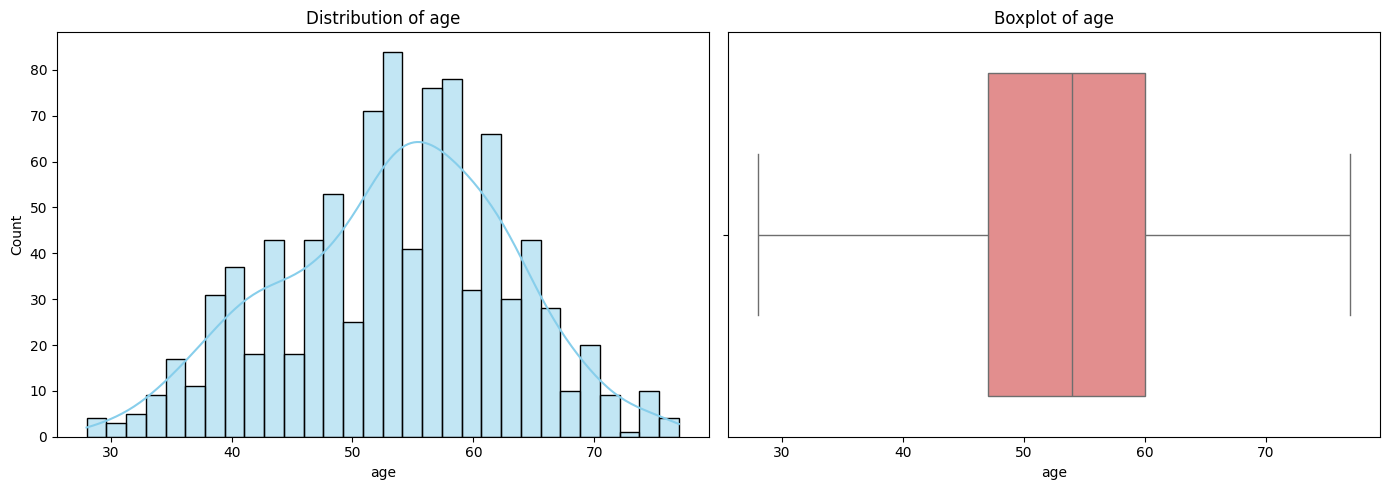

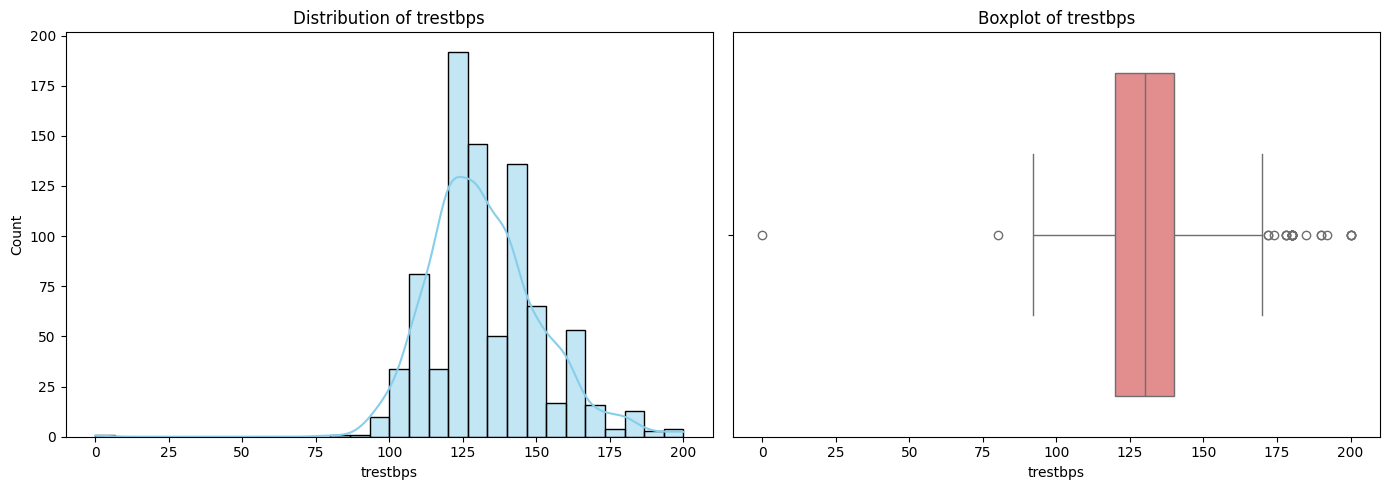

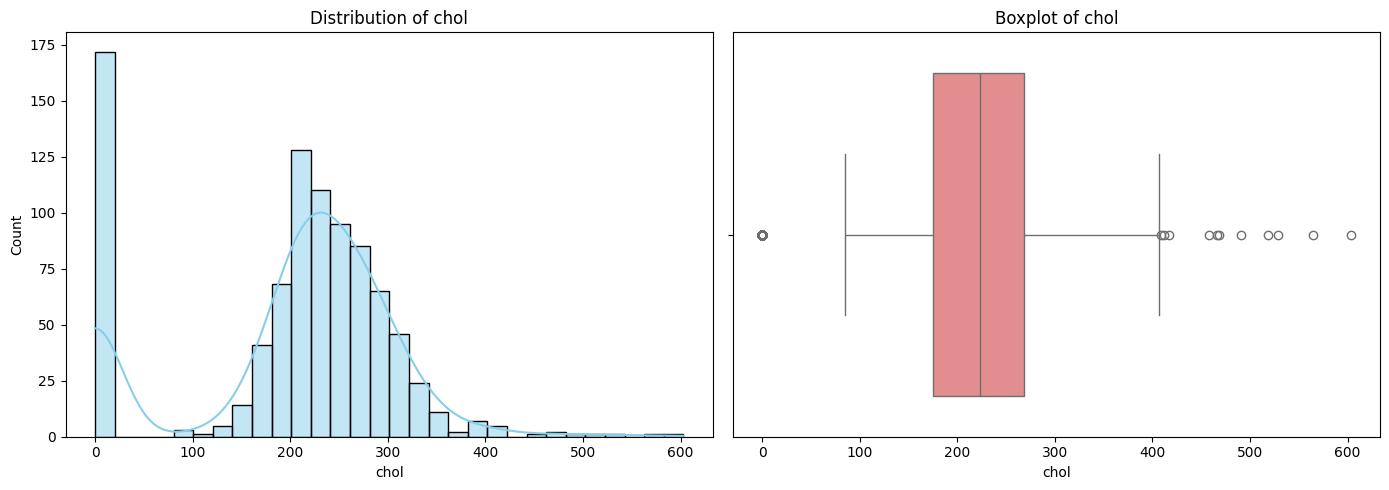

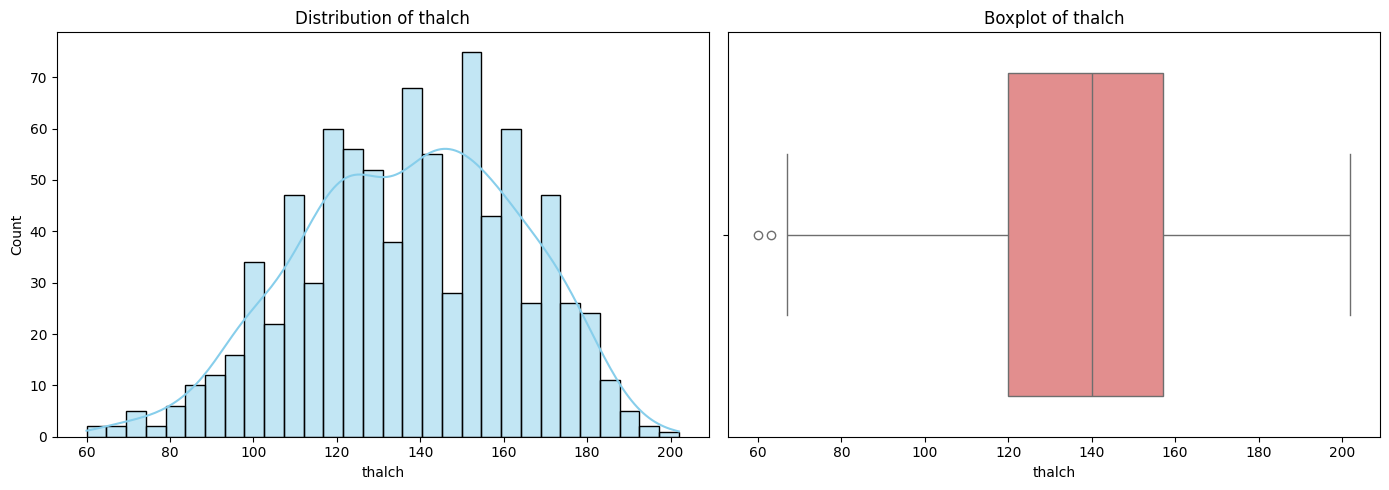

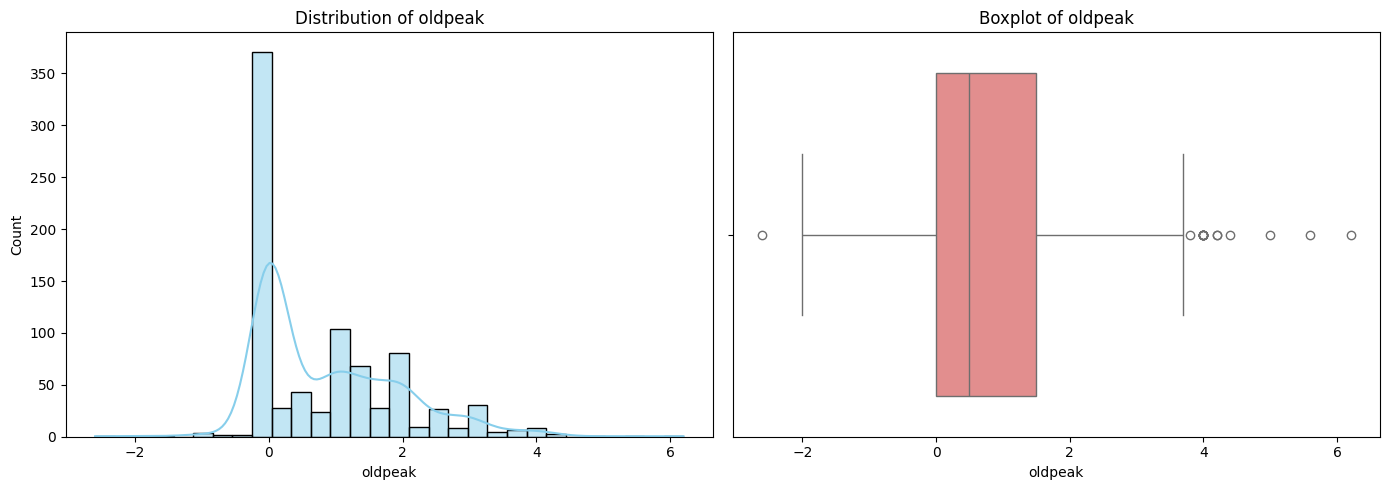

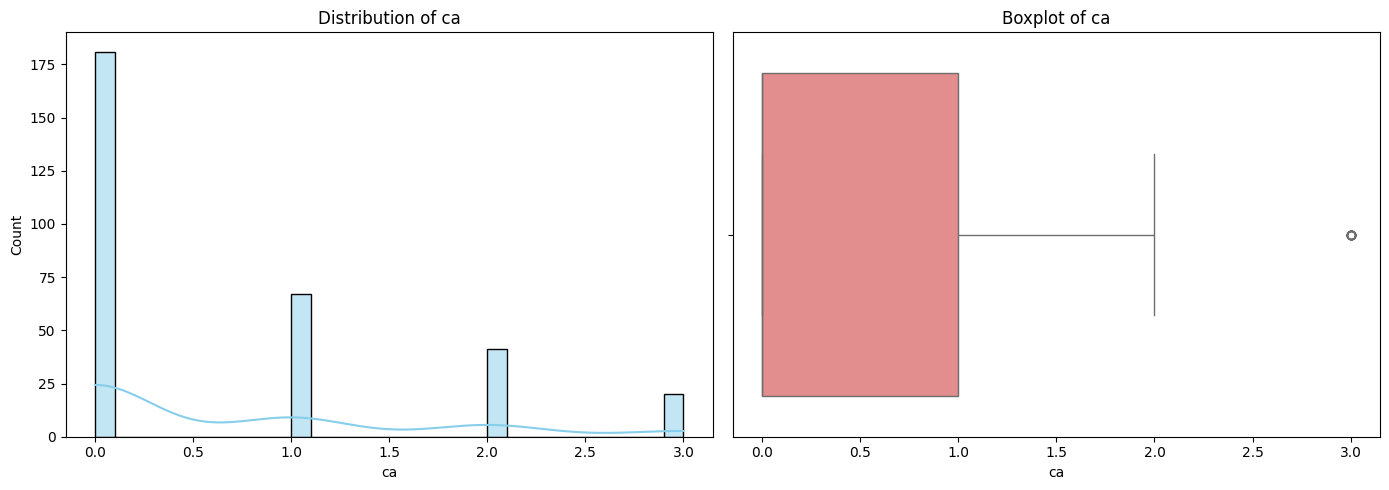

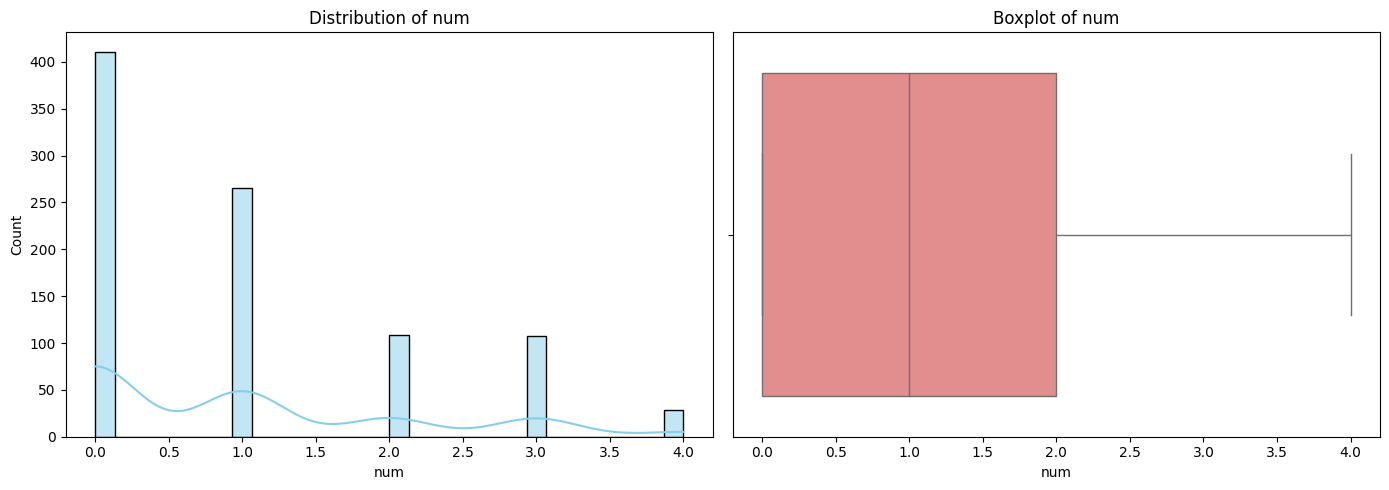

In [51]:
num_col_1=list(num_col)
num_col_1.remove('id')
for col in num_col_1:
    plt.figure(figsize= (14, 5))

    #Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(x=df[col],bins=30, color='skyblue',kde=True)
    plt.title(f"Distribution of {col}")


    #Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x= df[col],color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

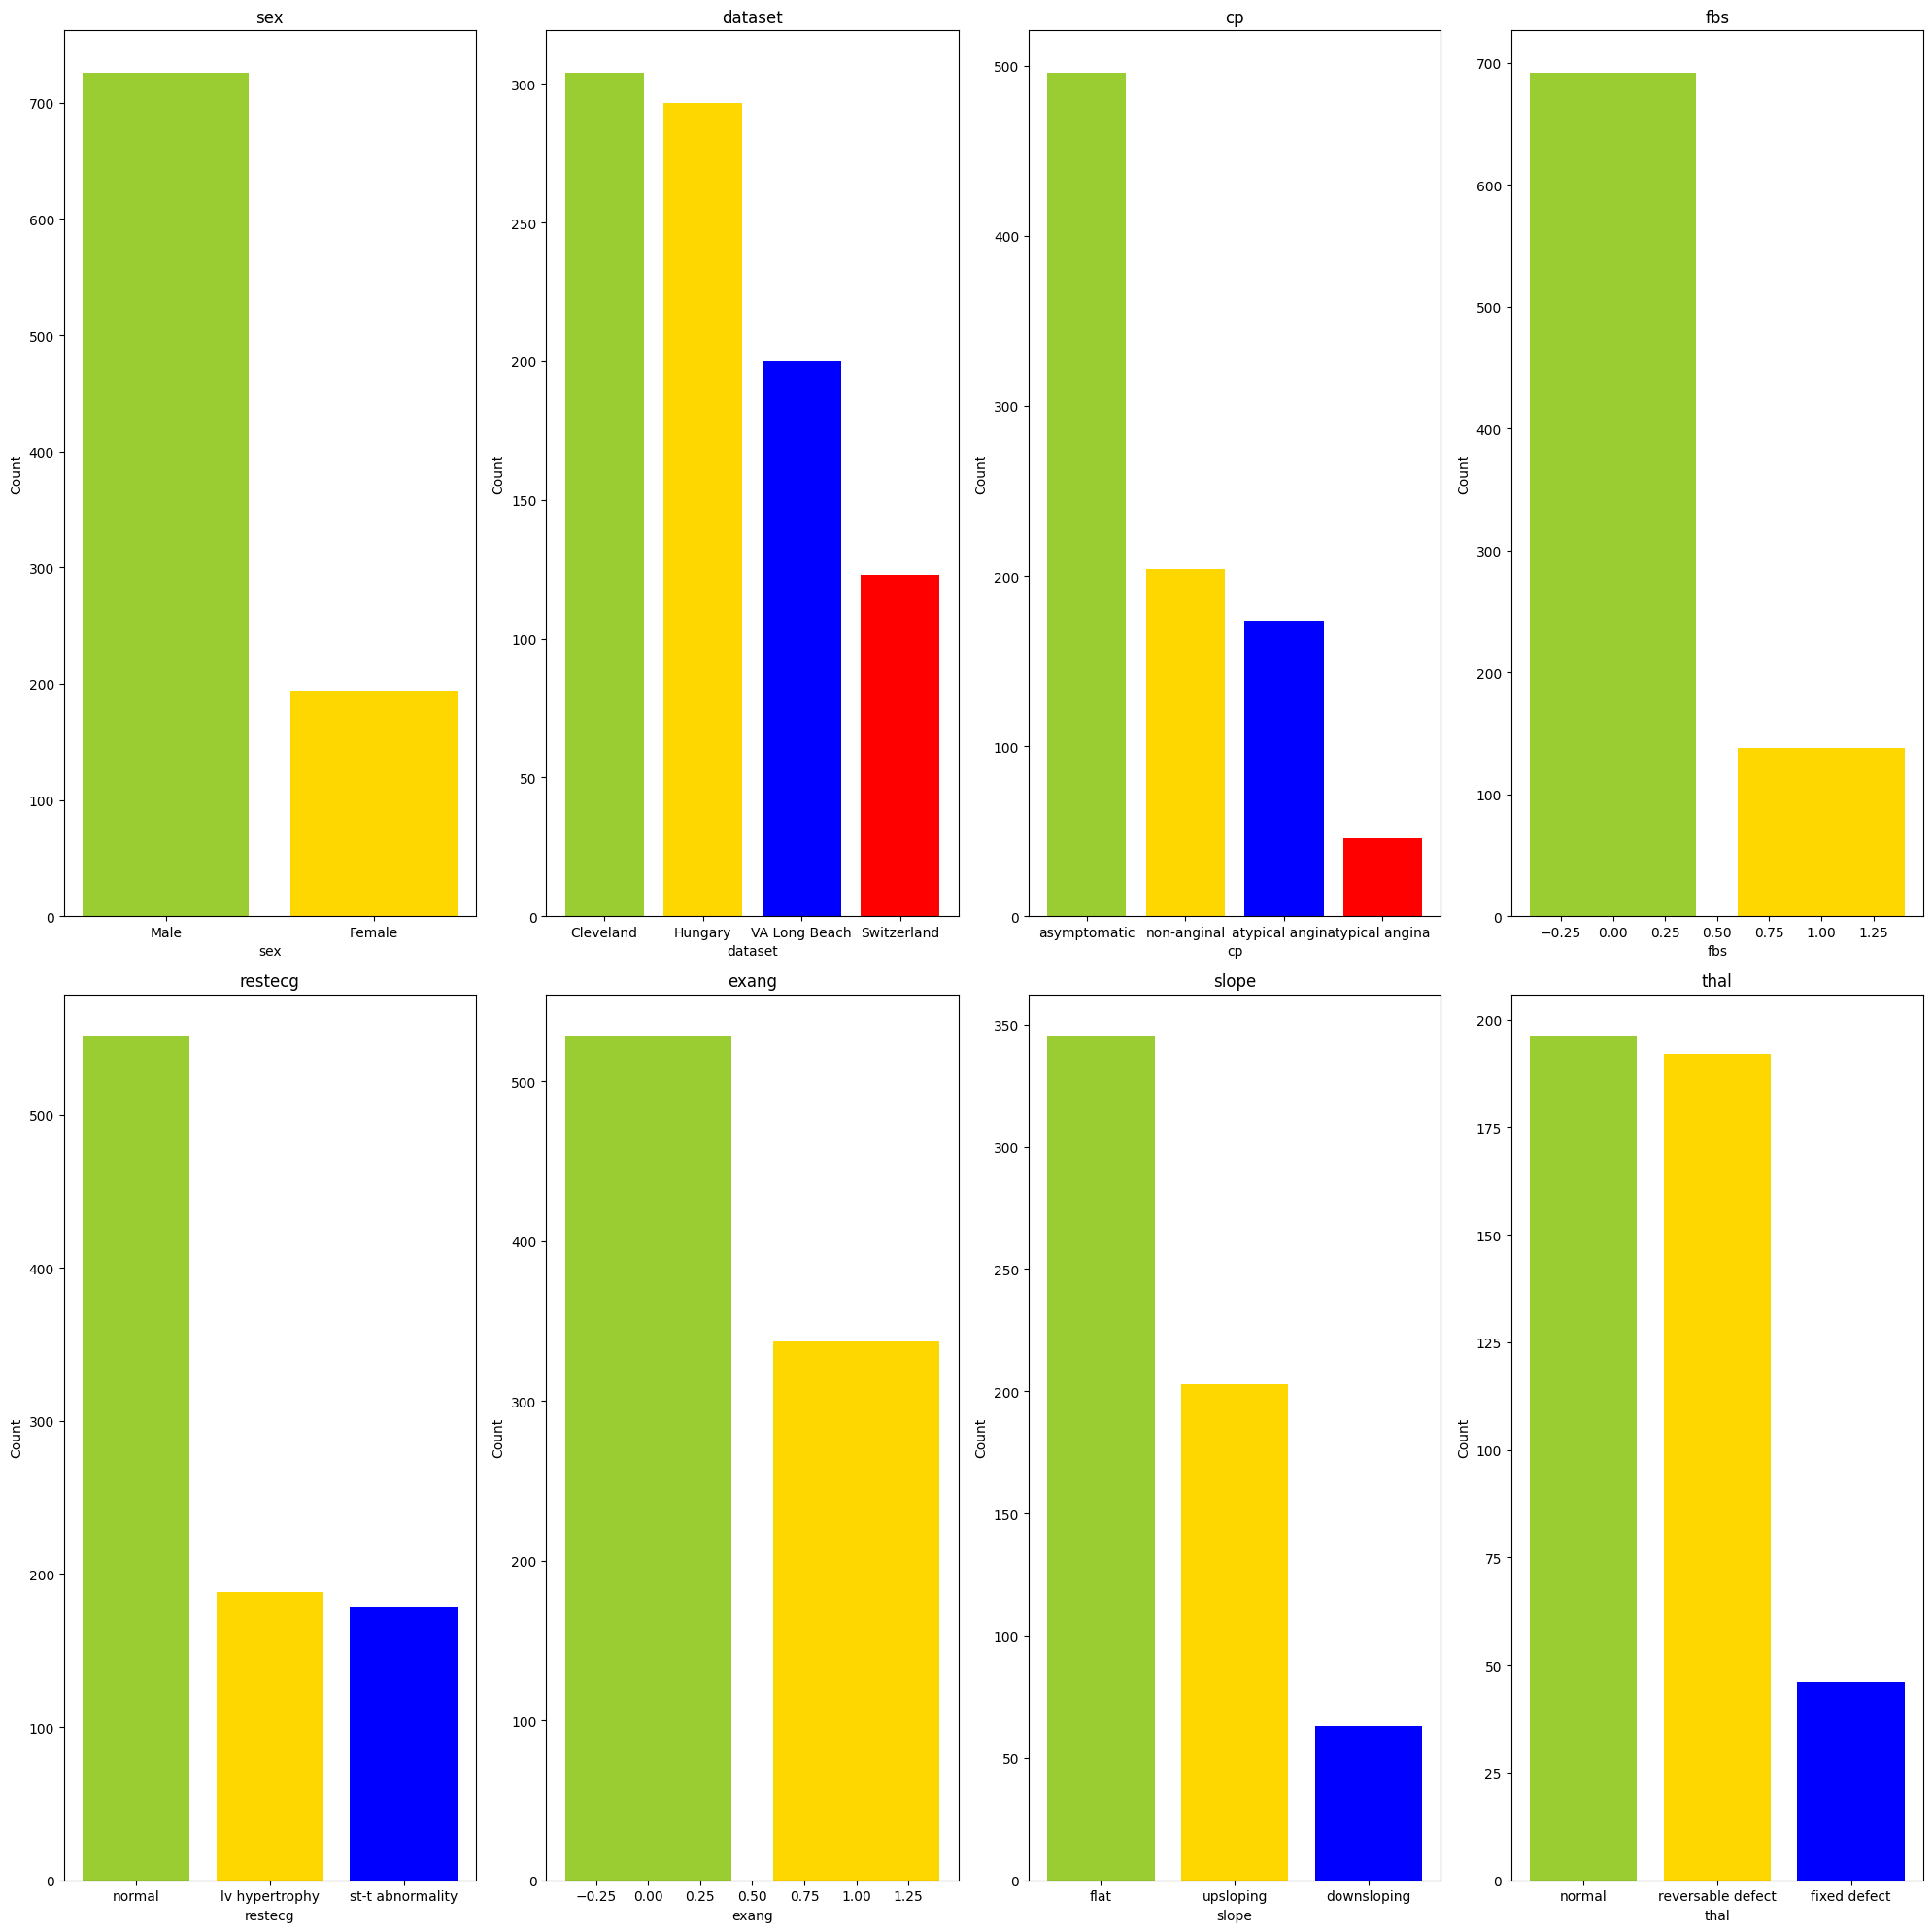

In [76]:

#bar plot :categorical data
plt.figure(figsize=(20, 20))
colors = ['yellowgreen', 'gold','blue','red']
for i, col in enumerate(cat_col):
    plt.subplot(2, 4, i+1)
    plt.bar(x=df[col].value_counts().index, height=df[col].value_counts(),color=colors,label=df[col].value_counts().index)
    plt.title(f"{col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count")


# Add a call to plt.tight_layout() to prevent labels from overlapping
plt.tight_layout()
plt.show()

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


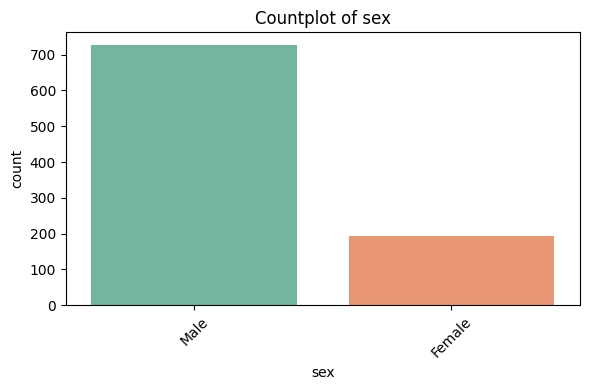

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


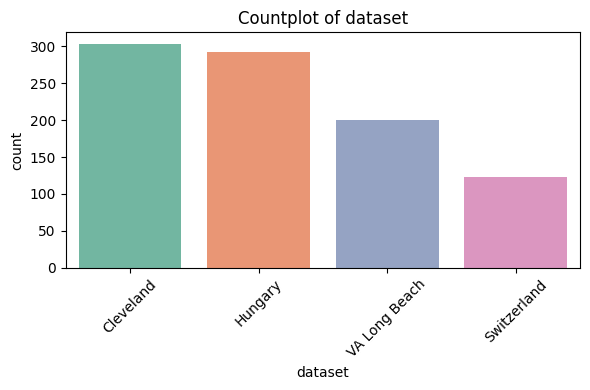

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


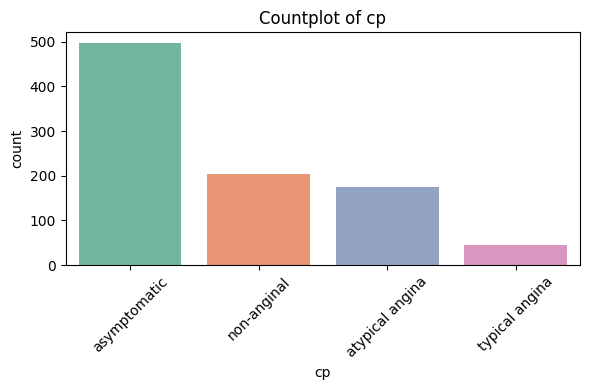

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


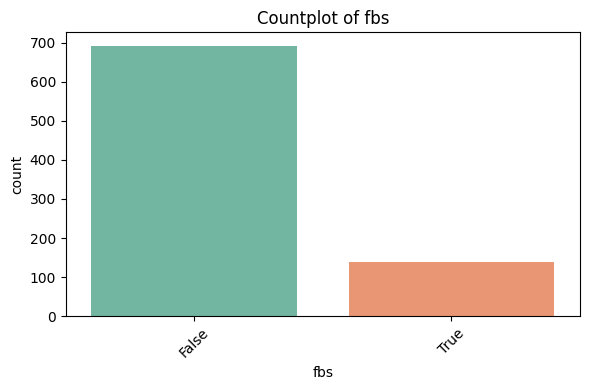

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


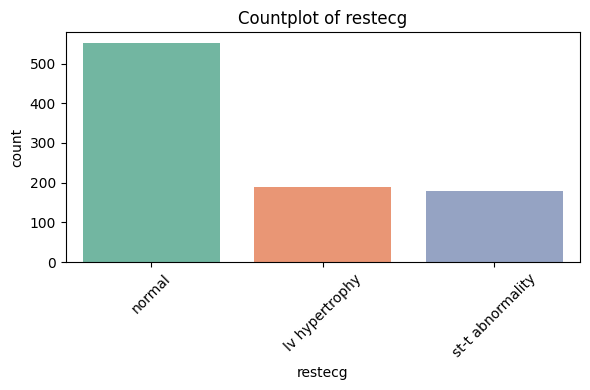

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


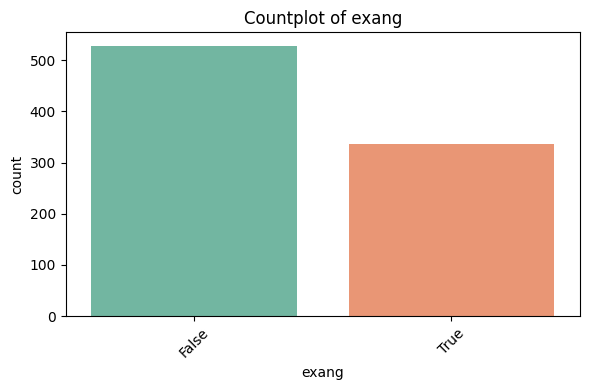

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


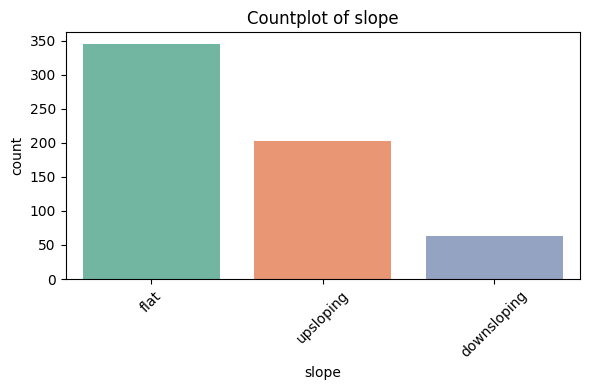

<ipython-input-77-f48fdd0a8574>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


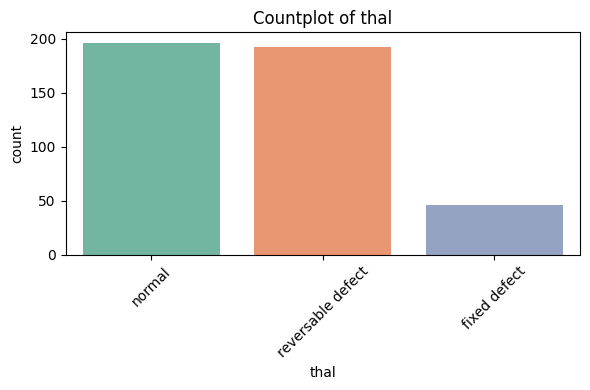

In [77]:
#count_plot
for col in cat_col:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

pie chart to define the percantage of each category in 8 cat columns


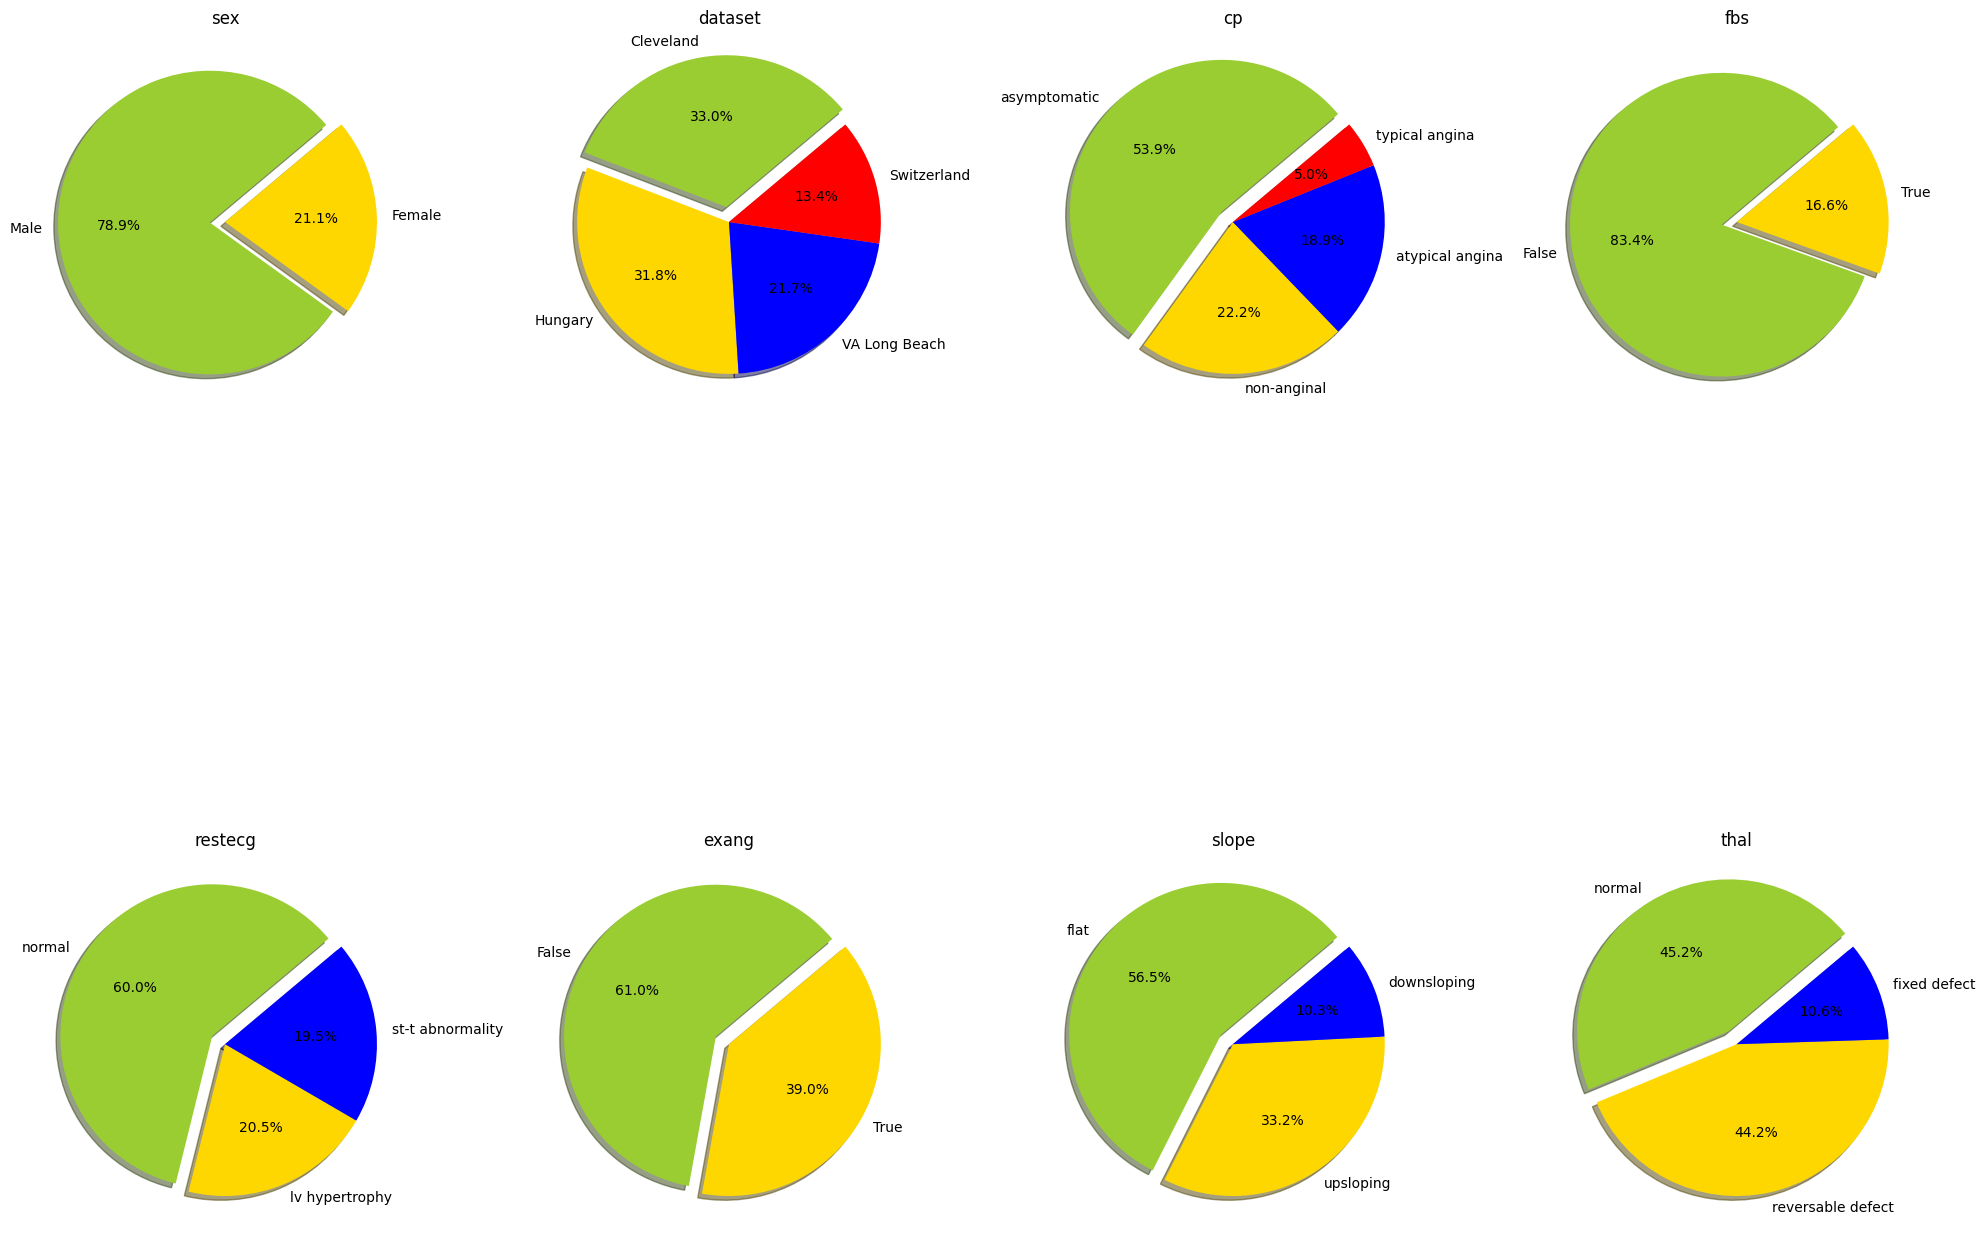

In [78]:
#pie chart :categorical data
plt.figure(figsize= (20, 20))
colors = ['yellowgreen', 'gold','blue','red']
for i, col in enumerate(cat_col):
    # Changed subplot grid to 2 rows and 4 columns to accommodate all 8 categorical columns
    plt.subplot(2, 4, i+ 1)
    # Dynamically create the explode tuple based on the number of unique values
    num_unique = df[col].nunique()
    # Ensure there are enough colors for the number of unique values
    current_colors = colors[:num_unique] if num_unique <= len(colors) else colors * (num_unique // len(colors) + 1)

    # Handle cases where there is only one unique value to avoid errors with explode
    #if num_unique > 1:
    explode = tuple([0.1] + [0] * (num_unique - 1))
    plt.pie(df[col].value_counts(),labels=df[col].value_counts().index, colors=current_colors,
            explode=explode,autopct='%1.1f%%',  shadow=True, startangle=400)
    plt.title(f"{col}")
   # else:
        # If only one unique value, plot without explode
    #plt.pie(df[col].value_counts(),labels=df[col].value_counts().index, colors=current_colors, shadow=True,autopct='%1.1f%%',  startangle=80)

# Add tight_layout to prevent labels from overlapping
plt.tight_layout()
plt.show()

## Bivariate Analysis
to study each two vars with each other

scatter for num vs num

we can defined that no relationship between them


In [ ]:
num_col.columns

Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

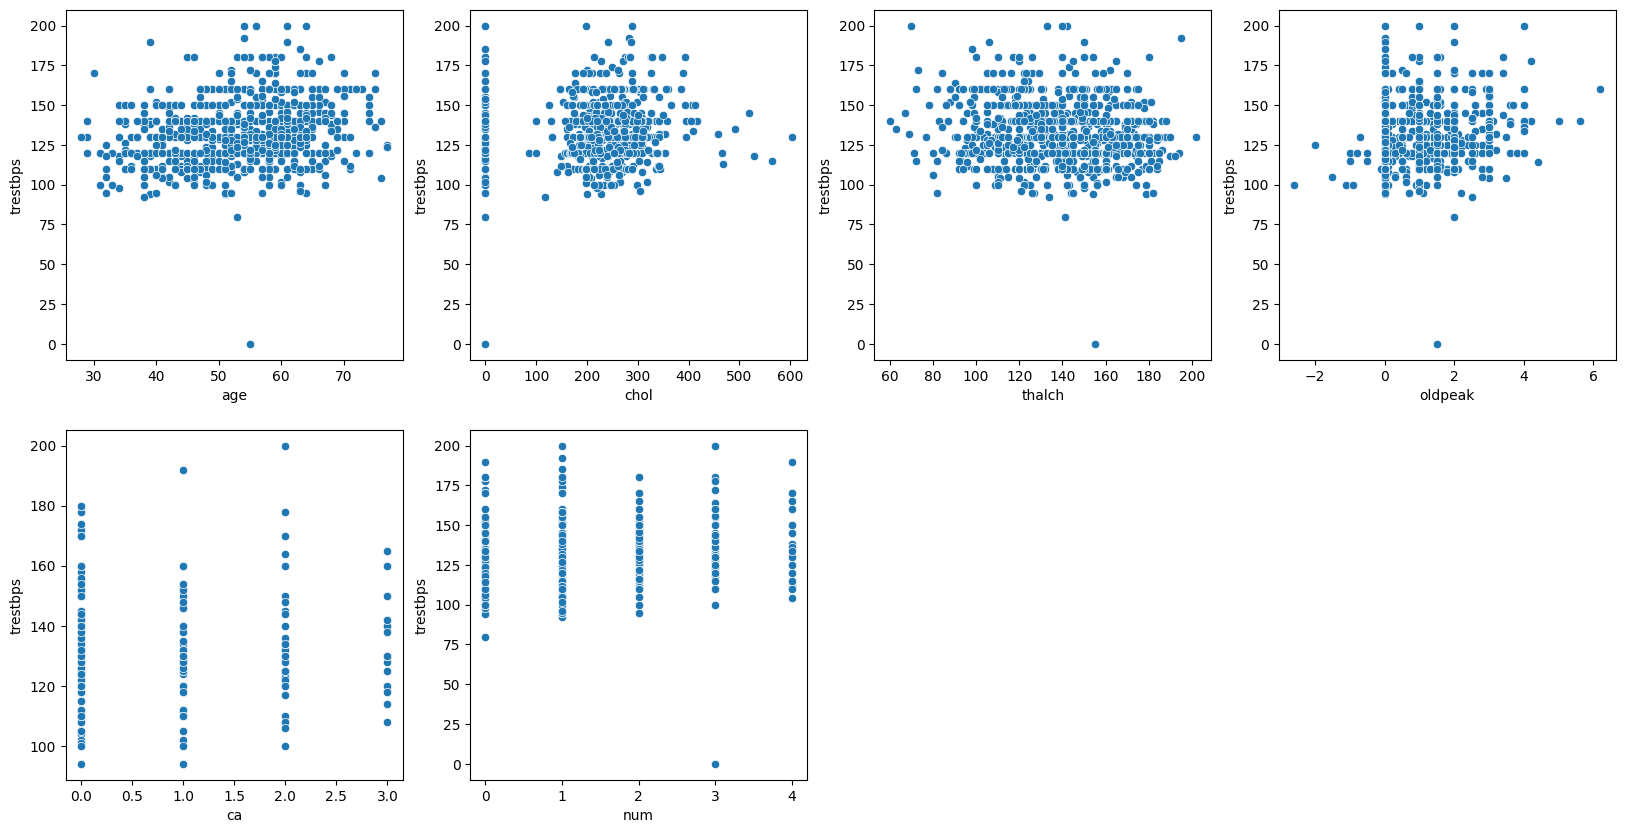

In [47]:
#scatter plot:num vs num

plt.figure(figsize= (20, 10))
columns = list(num_col)
columns.remove('trestbps')
columns.remove('id')

for i, col in enumerate(columns, 0):
    plt.subplot(2, 4, i+ 1)
    sns.scatterplot(x=df[col], y=df['trestbps'])
    plt.xlabel(f"{col}")
    plt.ylabel('trestbps')

plt.show()




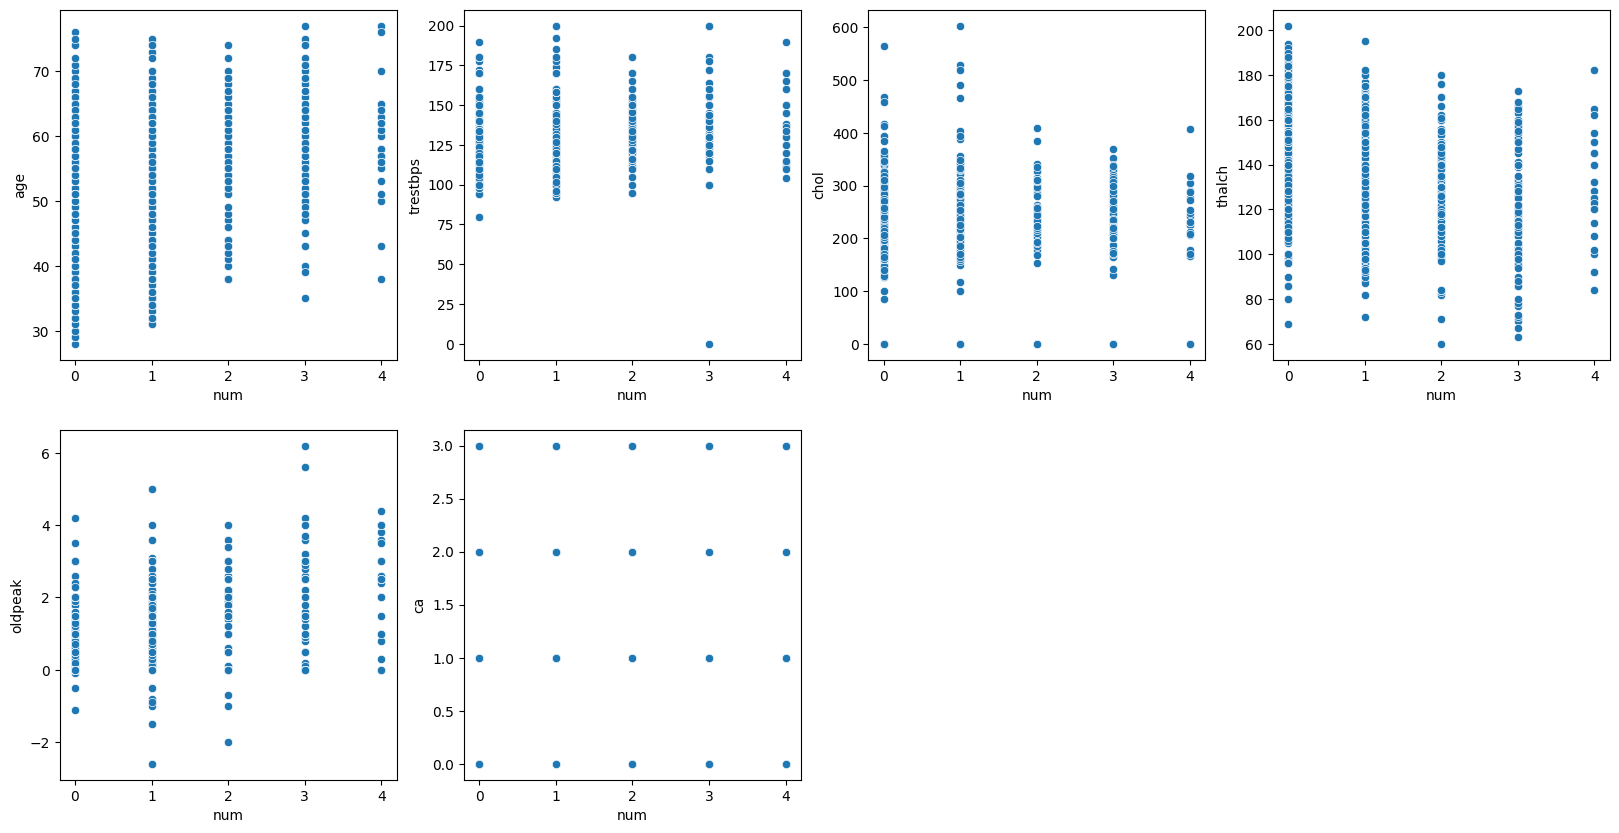

In [92]:
#scatter plot:num vs num
plt.figure(figsize= (20, 10))
columns = list(num_col)
columns.remove('num')
#columns.remove('age')
columns.remove('id')

for i, col in enumerate(columns, 0):
    plt.subplot(2, 4, i+ 1)
    sns.scatterplot(x=df['num'],y=df[col])
    plt.xlabel("num")
    plt.ylabel(f"{col}")

plt.show()




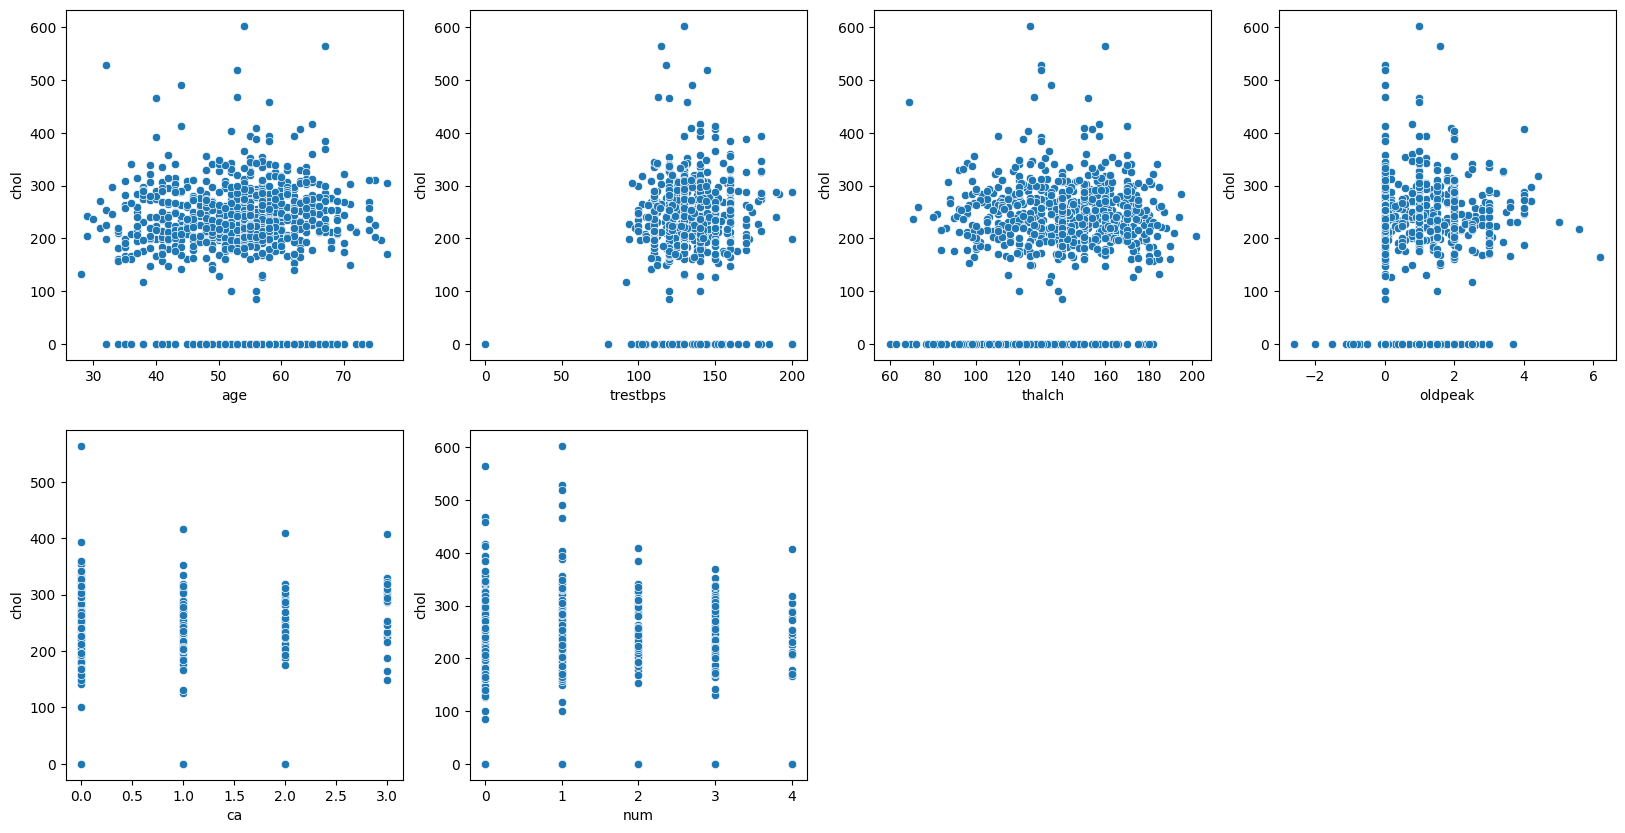

In [49]:
#scatter plot:num vs num
plt.figure(figsize= (20, 10))
columns = list(num_col)
columns.remove('chol')
#columns.remove('age')
columns.remove('id')

for i, col in enumerate(columns, 0):
    plt.subplot(2, 4, i+ 1)
    sns.scatterplot(x=df[col], y=df['chol'])
    plt.xlabel(f"{col}")
    plt.ylabel('chol')

plt.show()




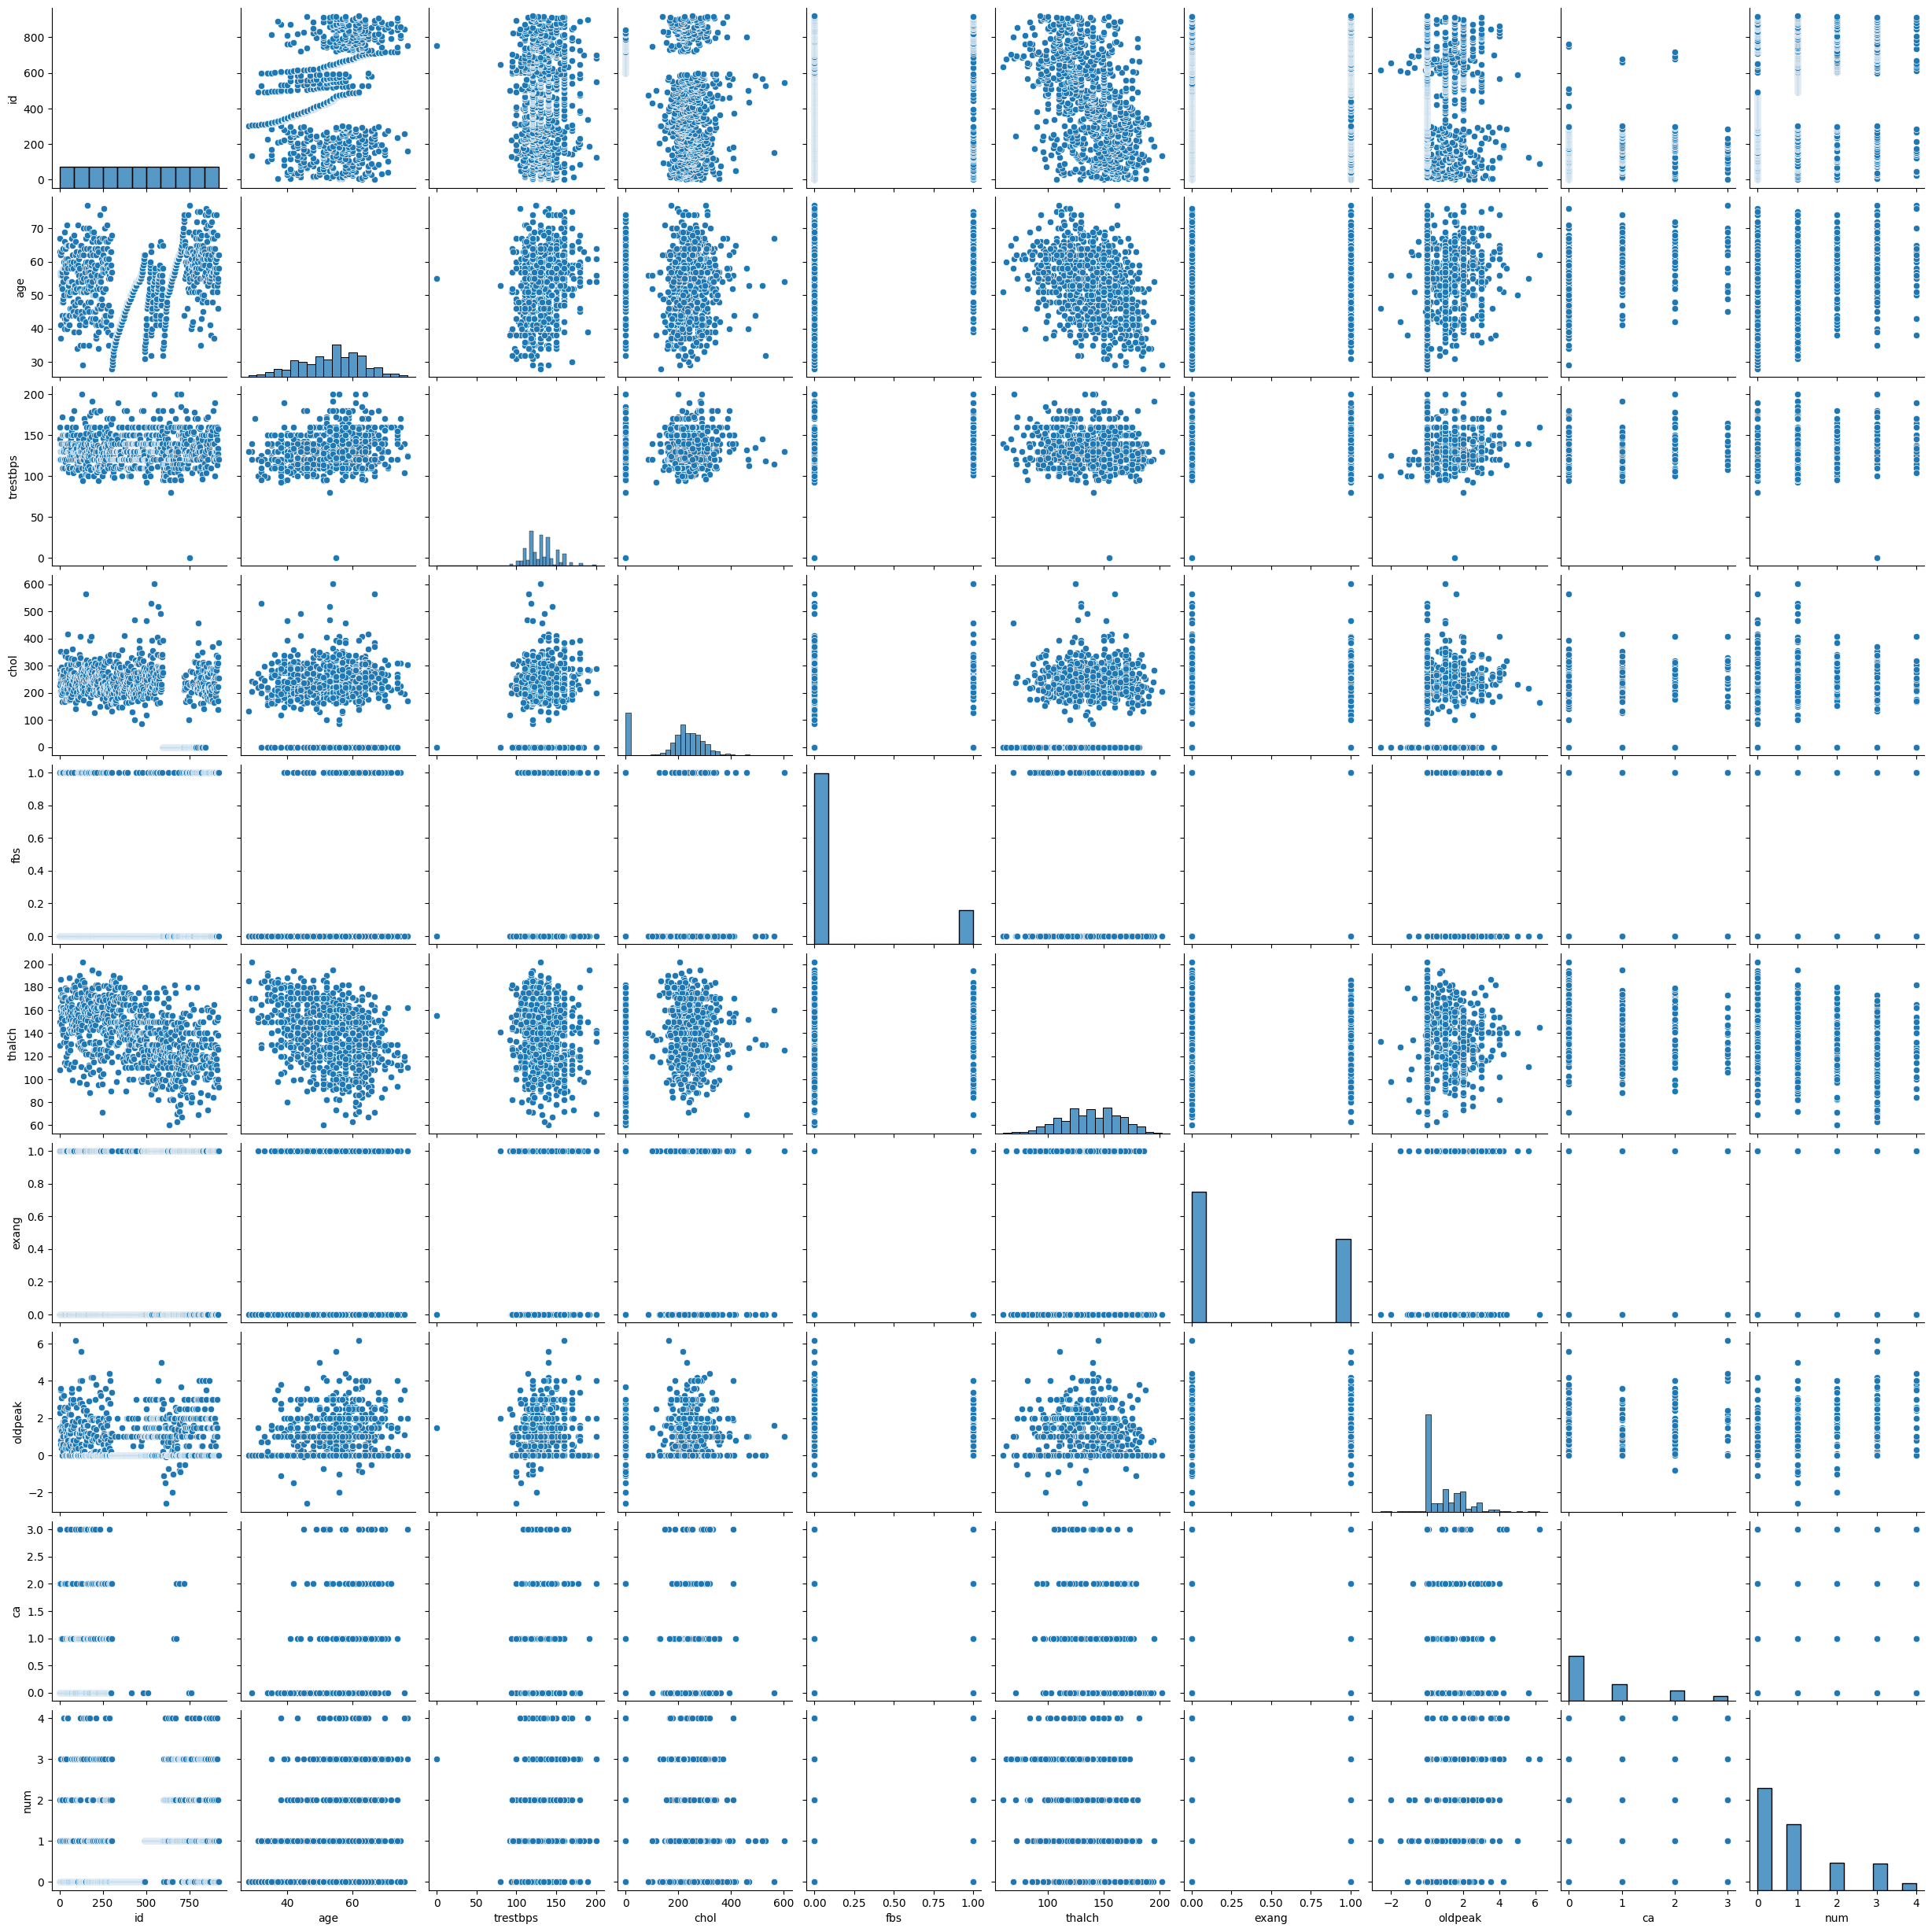

In [50]:
#scatter plot:num vs num
sns.pairplot(df)
plt.show()

comparison between the catagroies of cp, i notice that  highest number of patients has asymptomatic. most patients who have ST depression induced by exercise relative to rest also have asymptomatic and ca (number of major vessels)

<ipython-input-79-af79b8454a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set3')


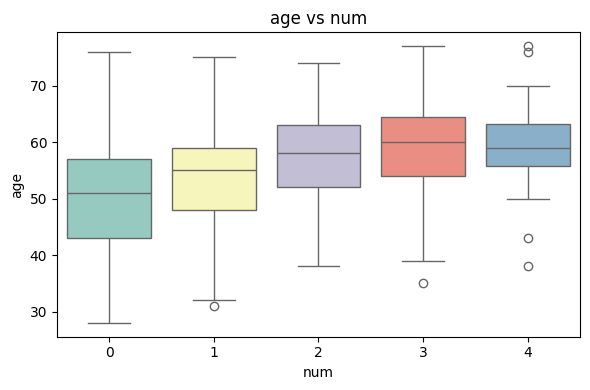

<ipython-input-79-af79b8454a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set3')


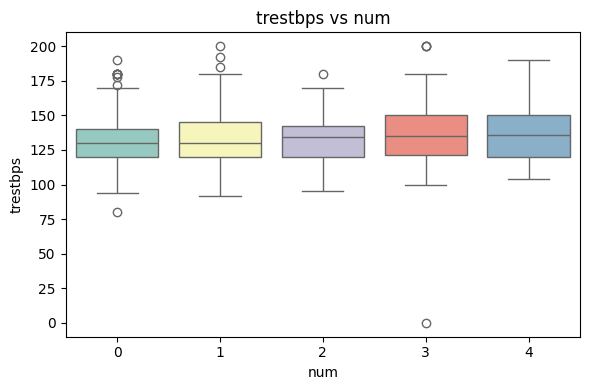

<ipython-input-79-af79b8454a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set3')


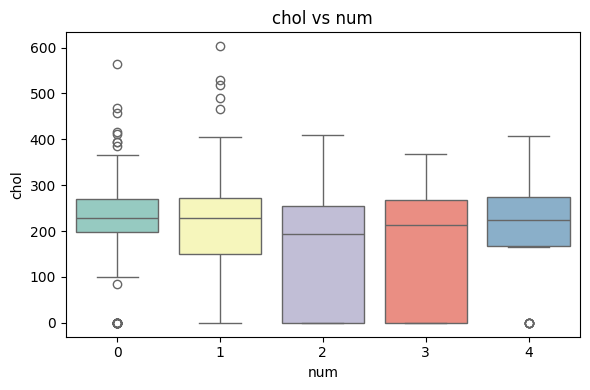

<ipython-input-79-af79b8454a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set3')


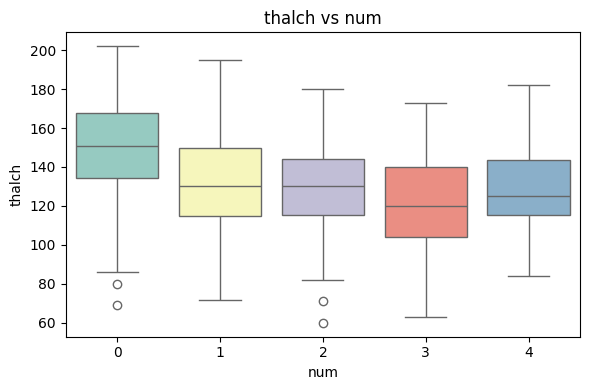

<ipython-input-79-af79b8454a3e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num', y=col, data=df, palette='Set3')


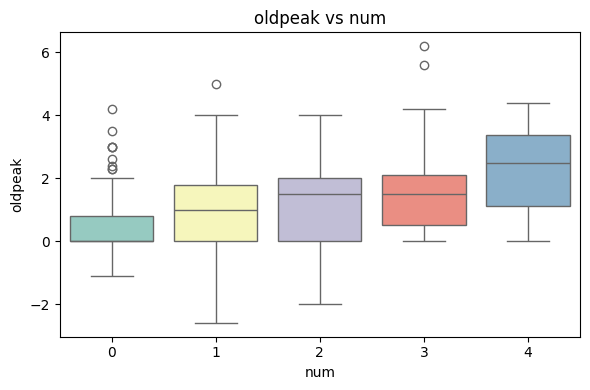

In [79]:
# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Boxplots for numerical columns vs target
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='num', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs num')
    plt.tight_layout()
    plt.show()

In [ ]:
cat_col.columns

Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

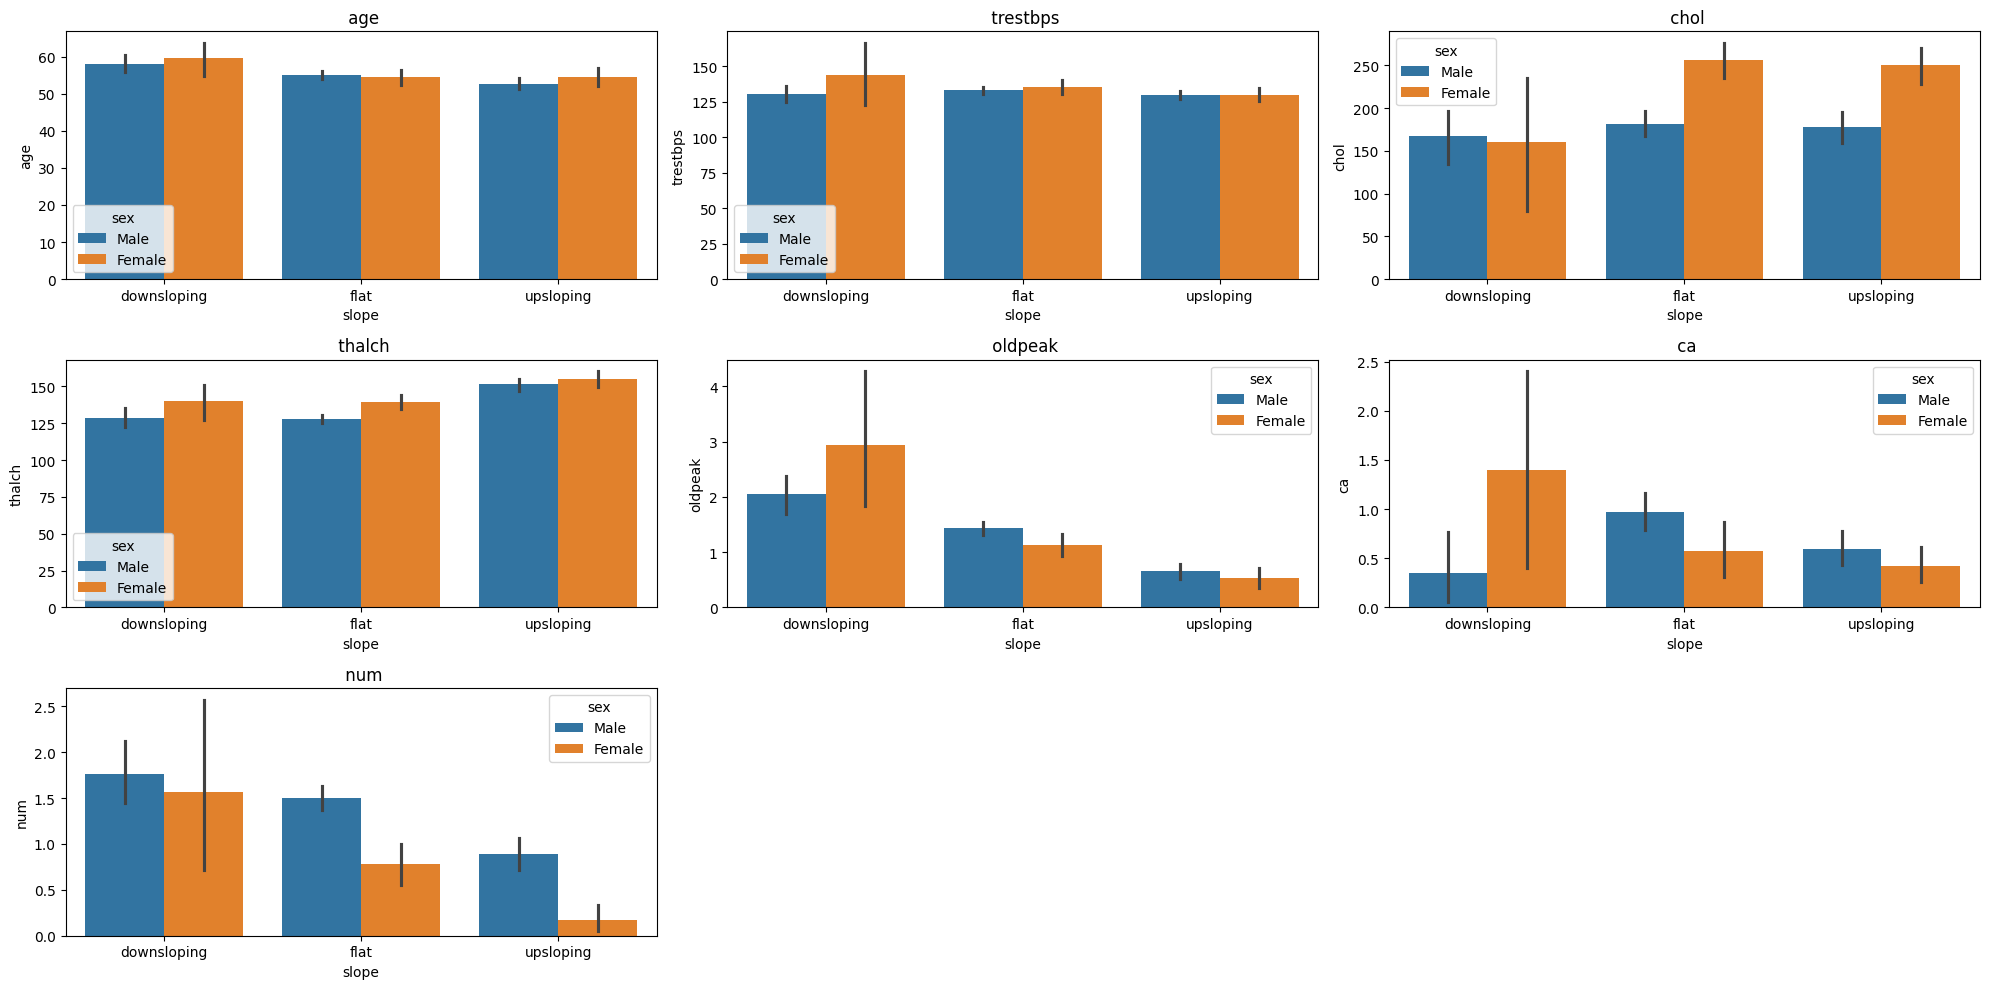

In [69]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['slope'], y=df[col],hue=df['sex'])

    plt.xlabel(f"slope")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

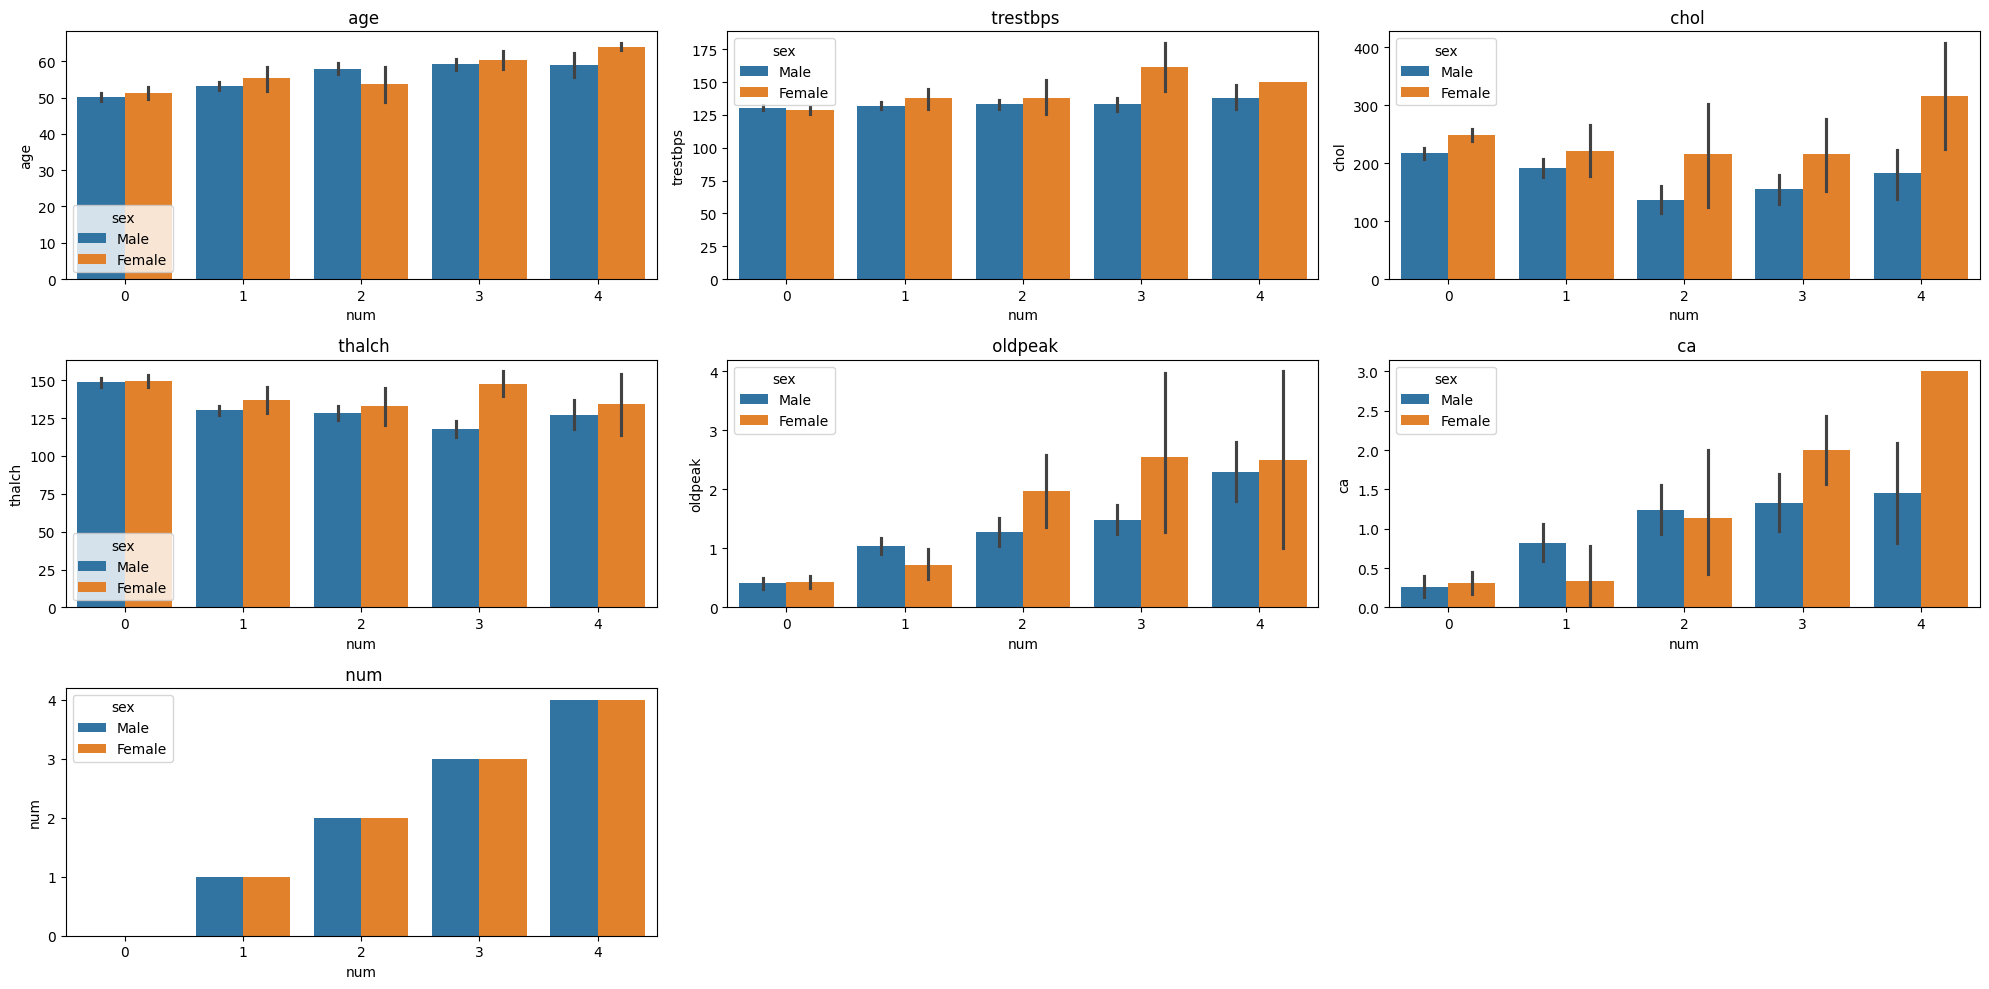

In [59]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
num_col_2=list(num_col_1)
num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['num'], y=df[col],hue=df['sex'])

    plt.xlabel(f"num")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

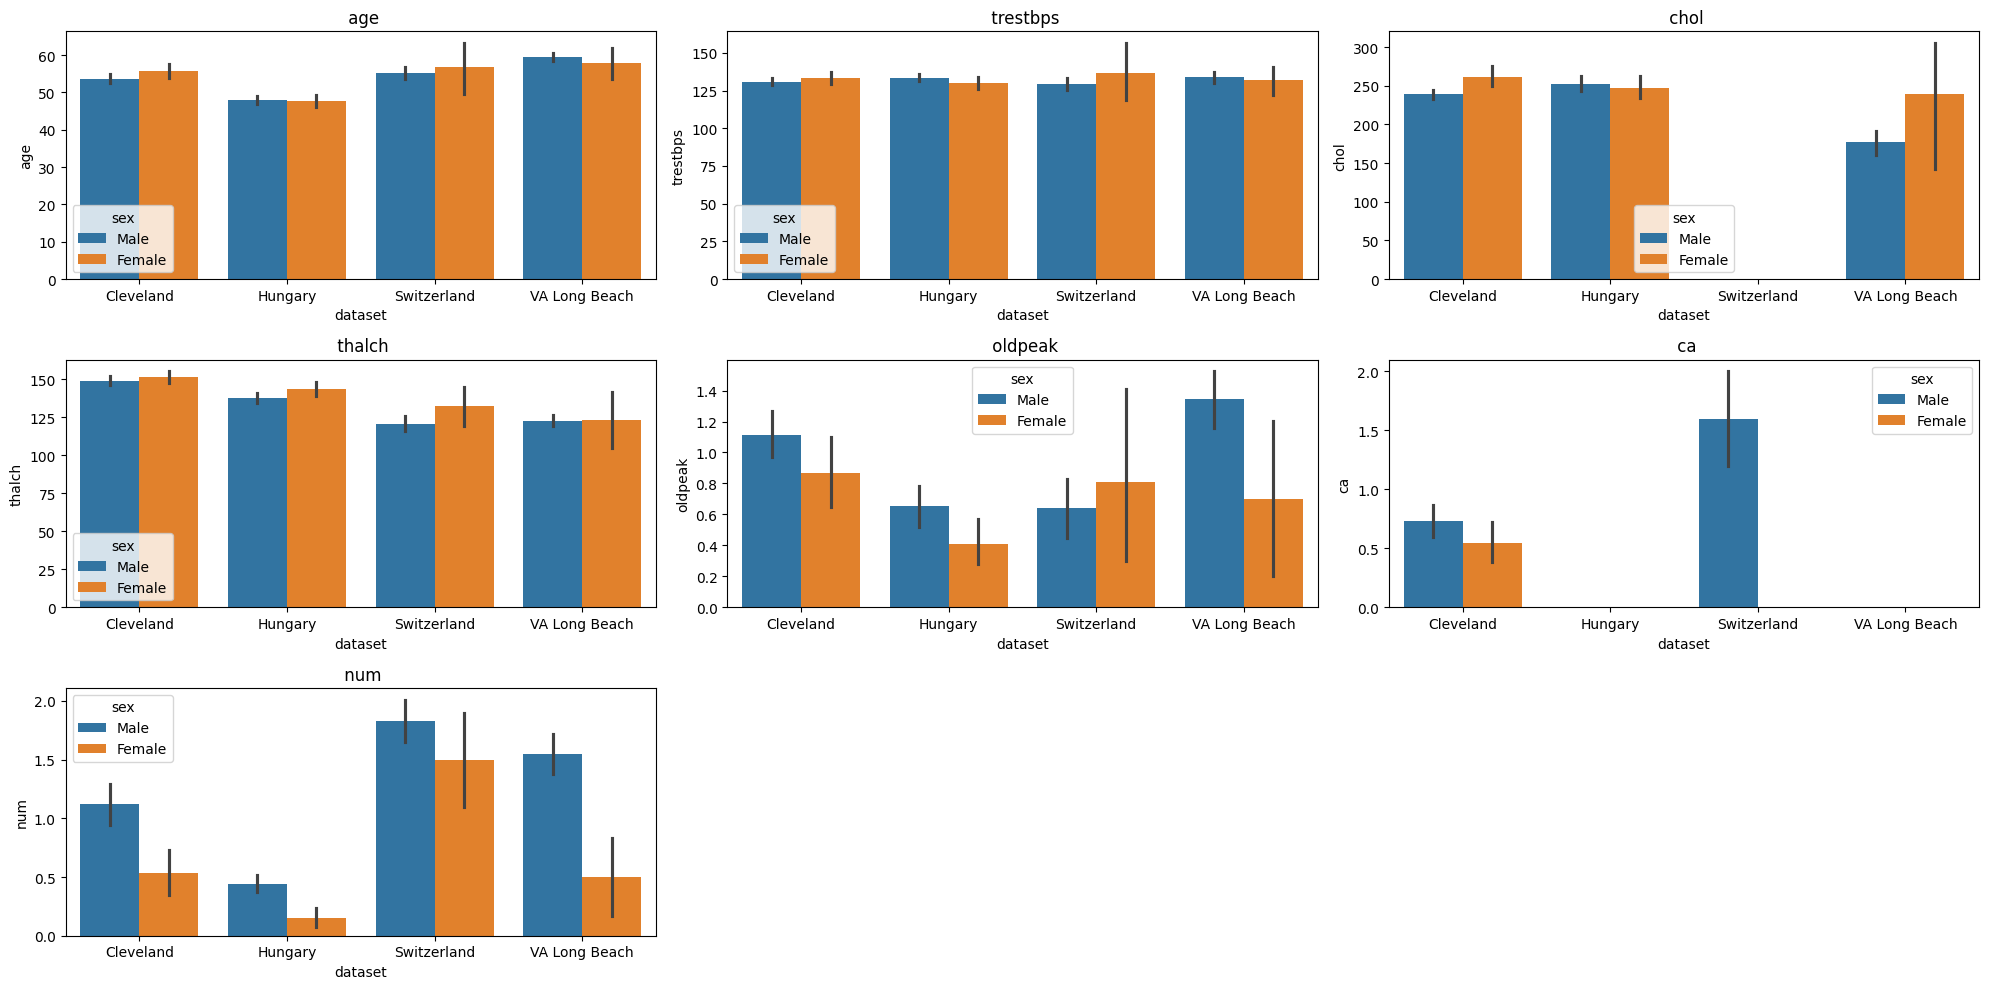

In [64]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['dataset'], y=df[col],hue=df['sex'])

    plt.xlabel(f"dataset")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

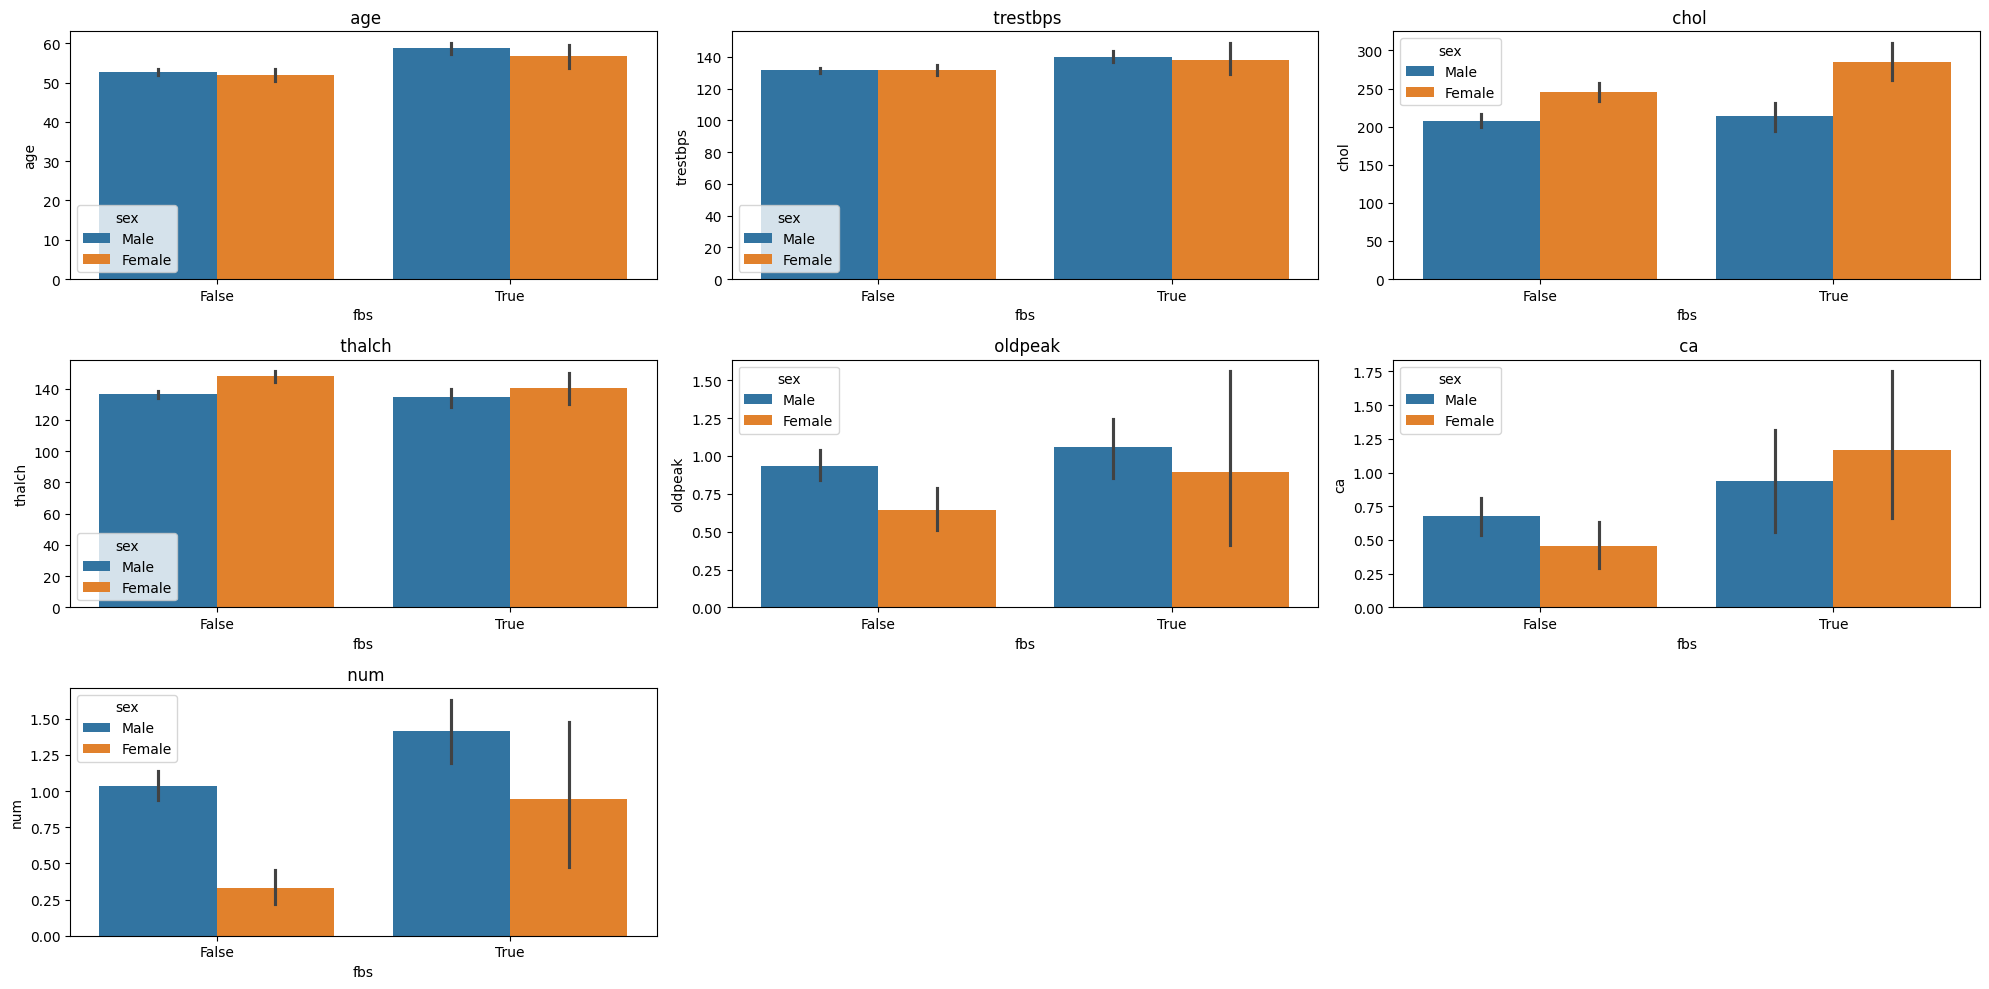

In [66]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['fbs'], y=df[col],hue=df['sex'])

    plt.xlabel(f"fbs")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

In [ ]:
cat_col_g=list(cat_col)
cat_col_g.remove('sex')
cat_col_g
for i, col in enumerate(cat_col_g):
    plt.figure(figsize= (20, 10))
    sns.barplot(x=df['restecg'], y=df[col],hue=df['sex'])
    plt.title('Bar Chart')
    plt.xlabel('restecg')
    plt.ylabel(f"{col}")
plt.show()

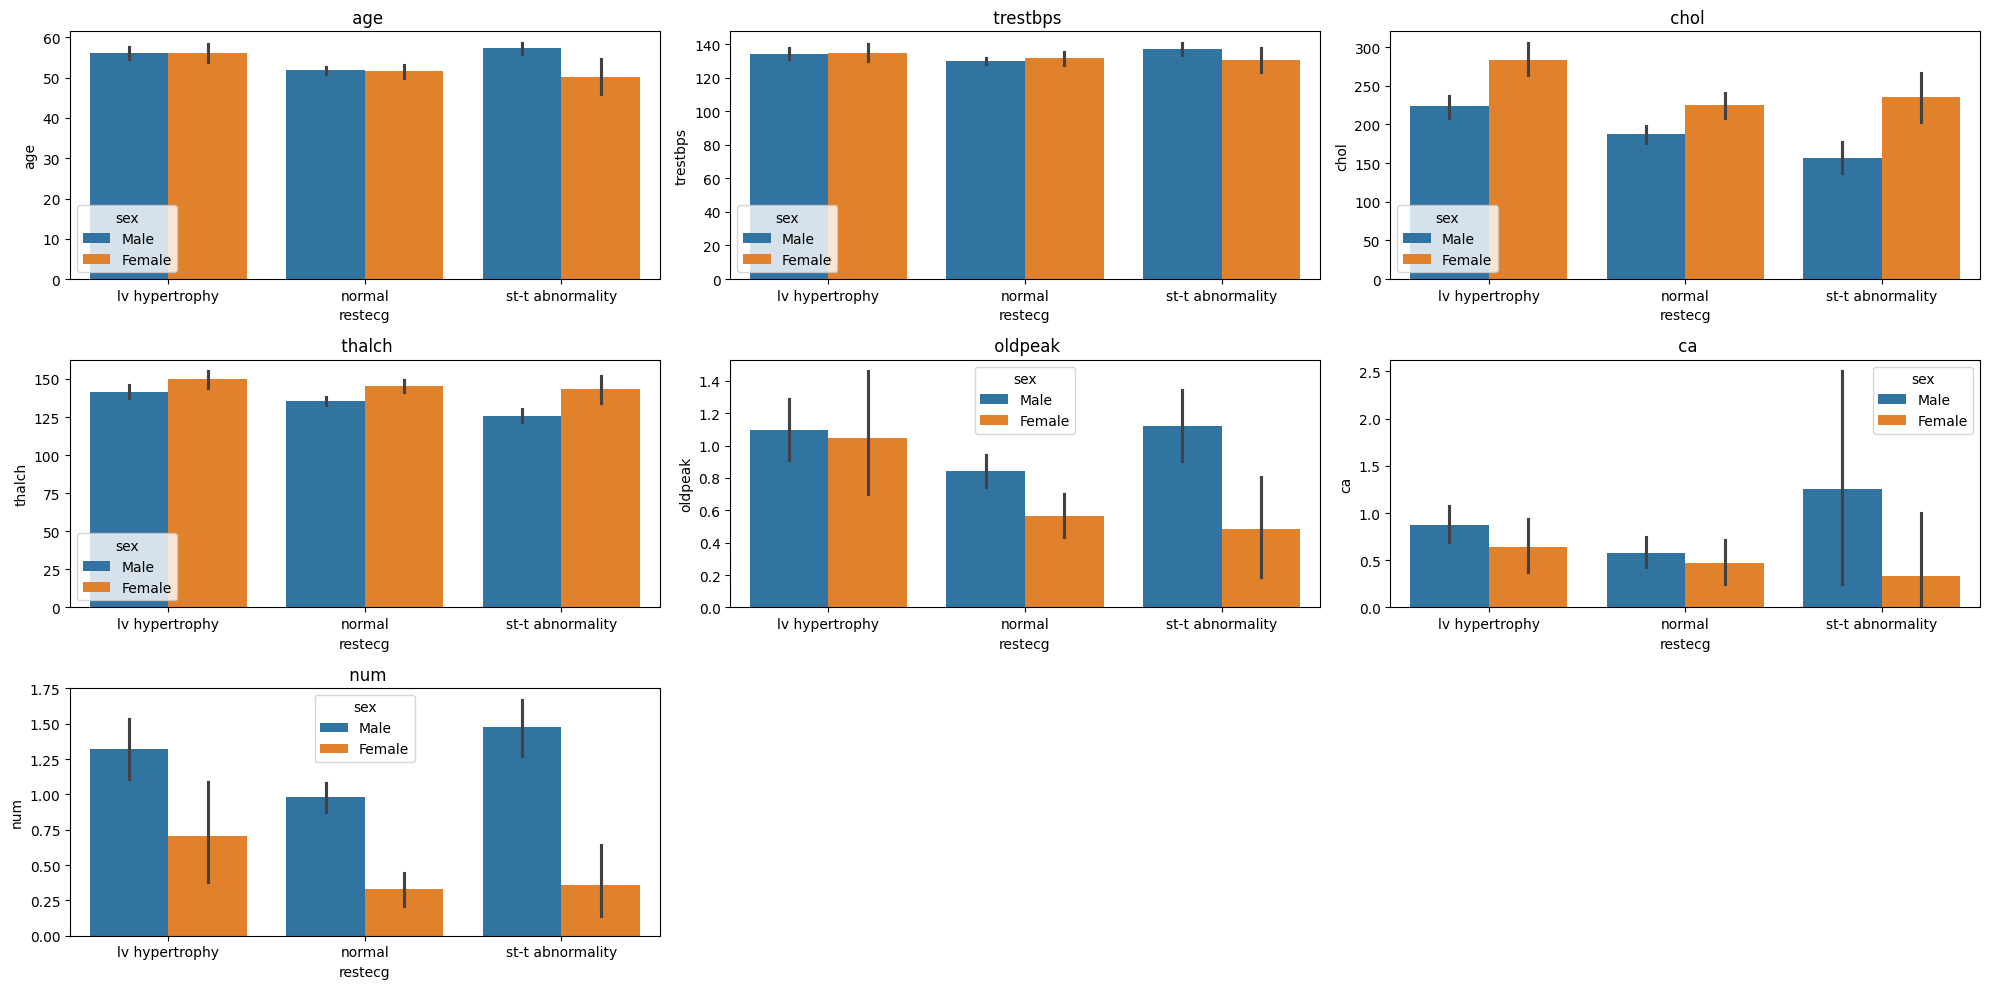

In [67]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['restecg'], y=df[col],hue=df['sex'])

    plt.xlabel(f"restecg")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

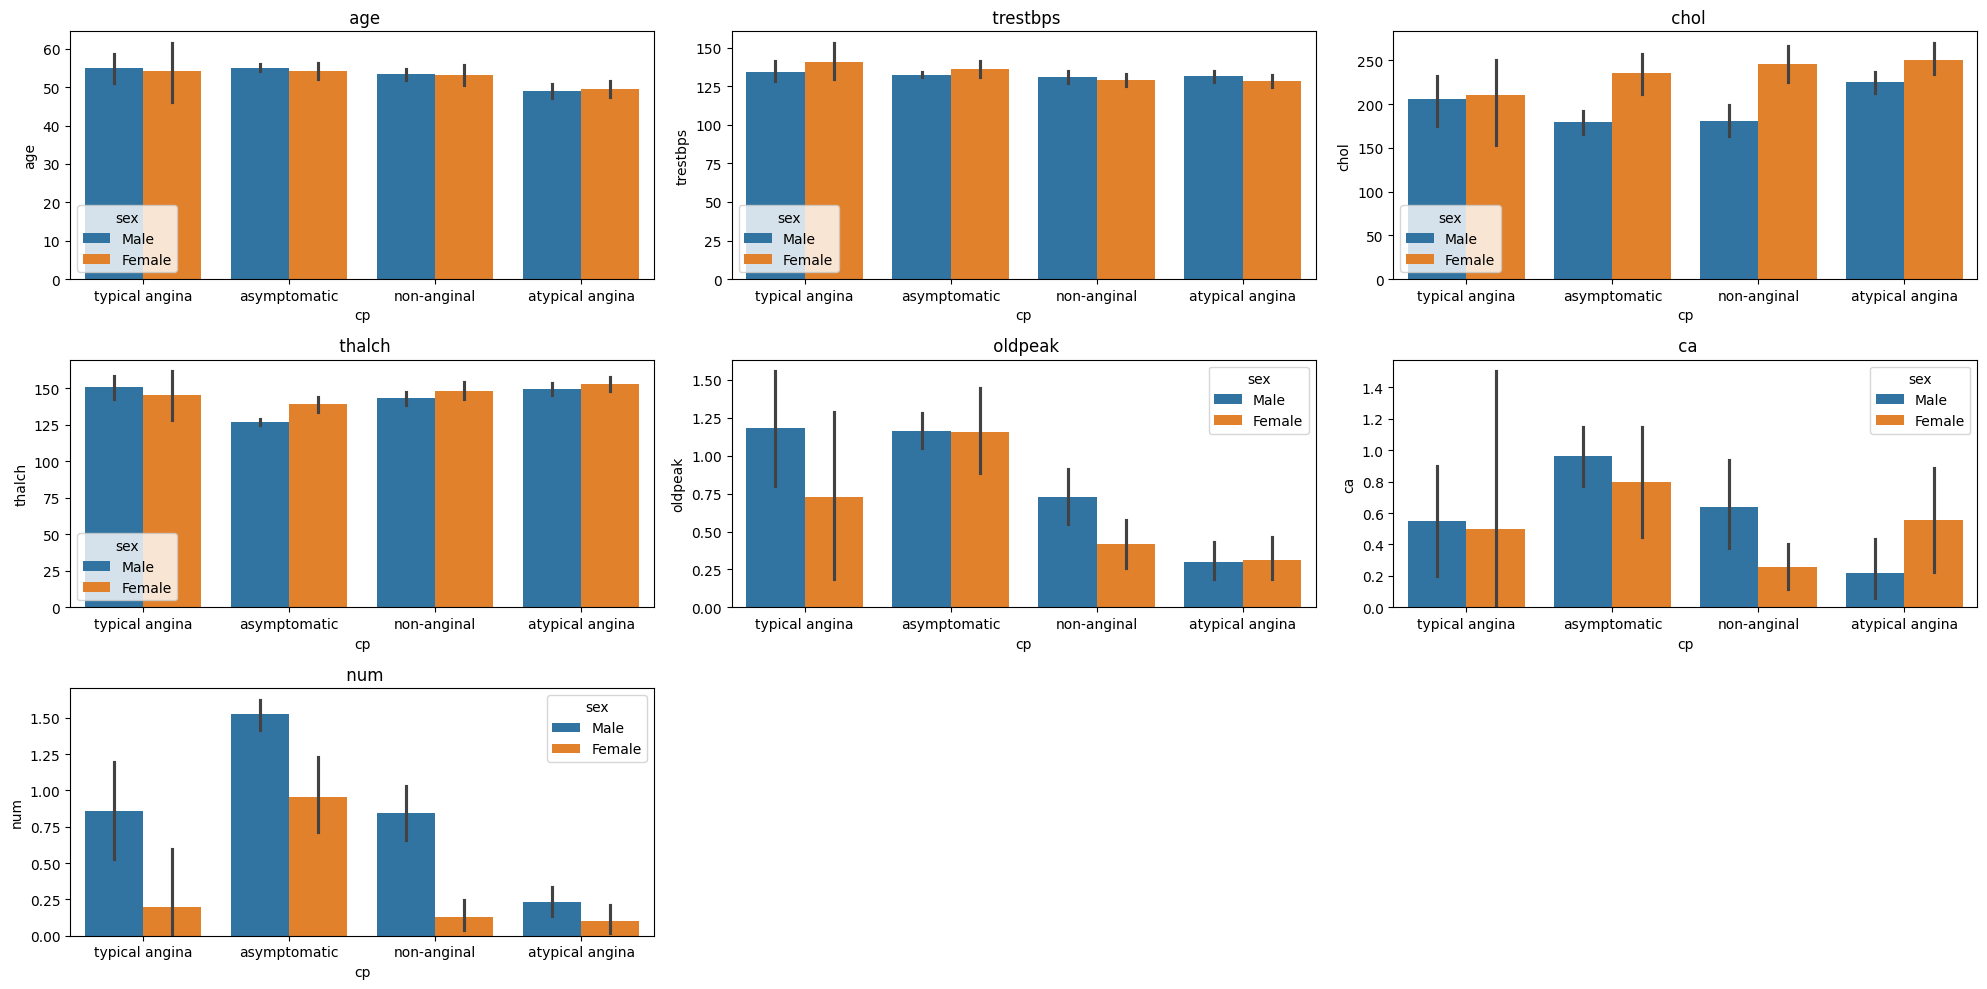

In [60]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['cp'], y=df[col],hue=df['sex'])

    plt.xlabel(f"cp")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()


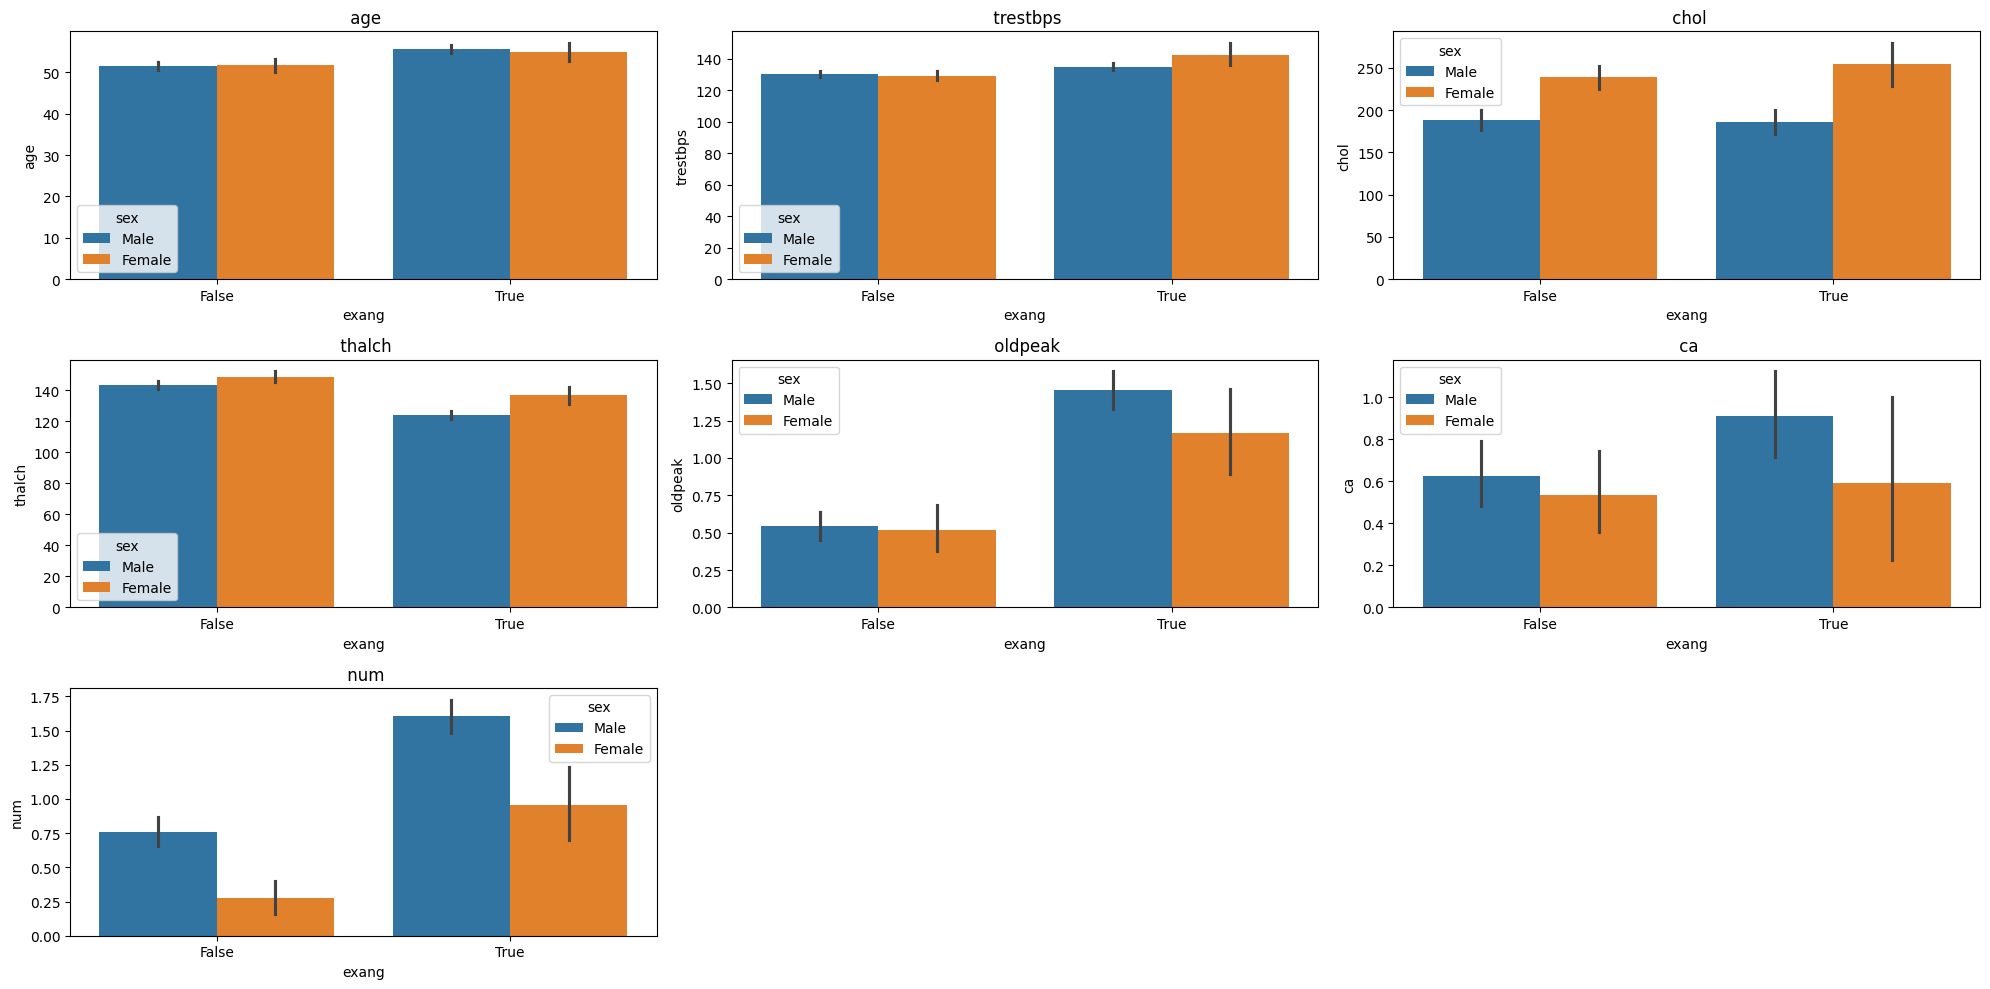

In [68]:

#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['exang'], y=df[col],hue=df['sex'])

    plt.xlabel(f"exang")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

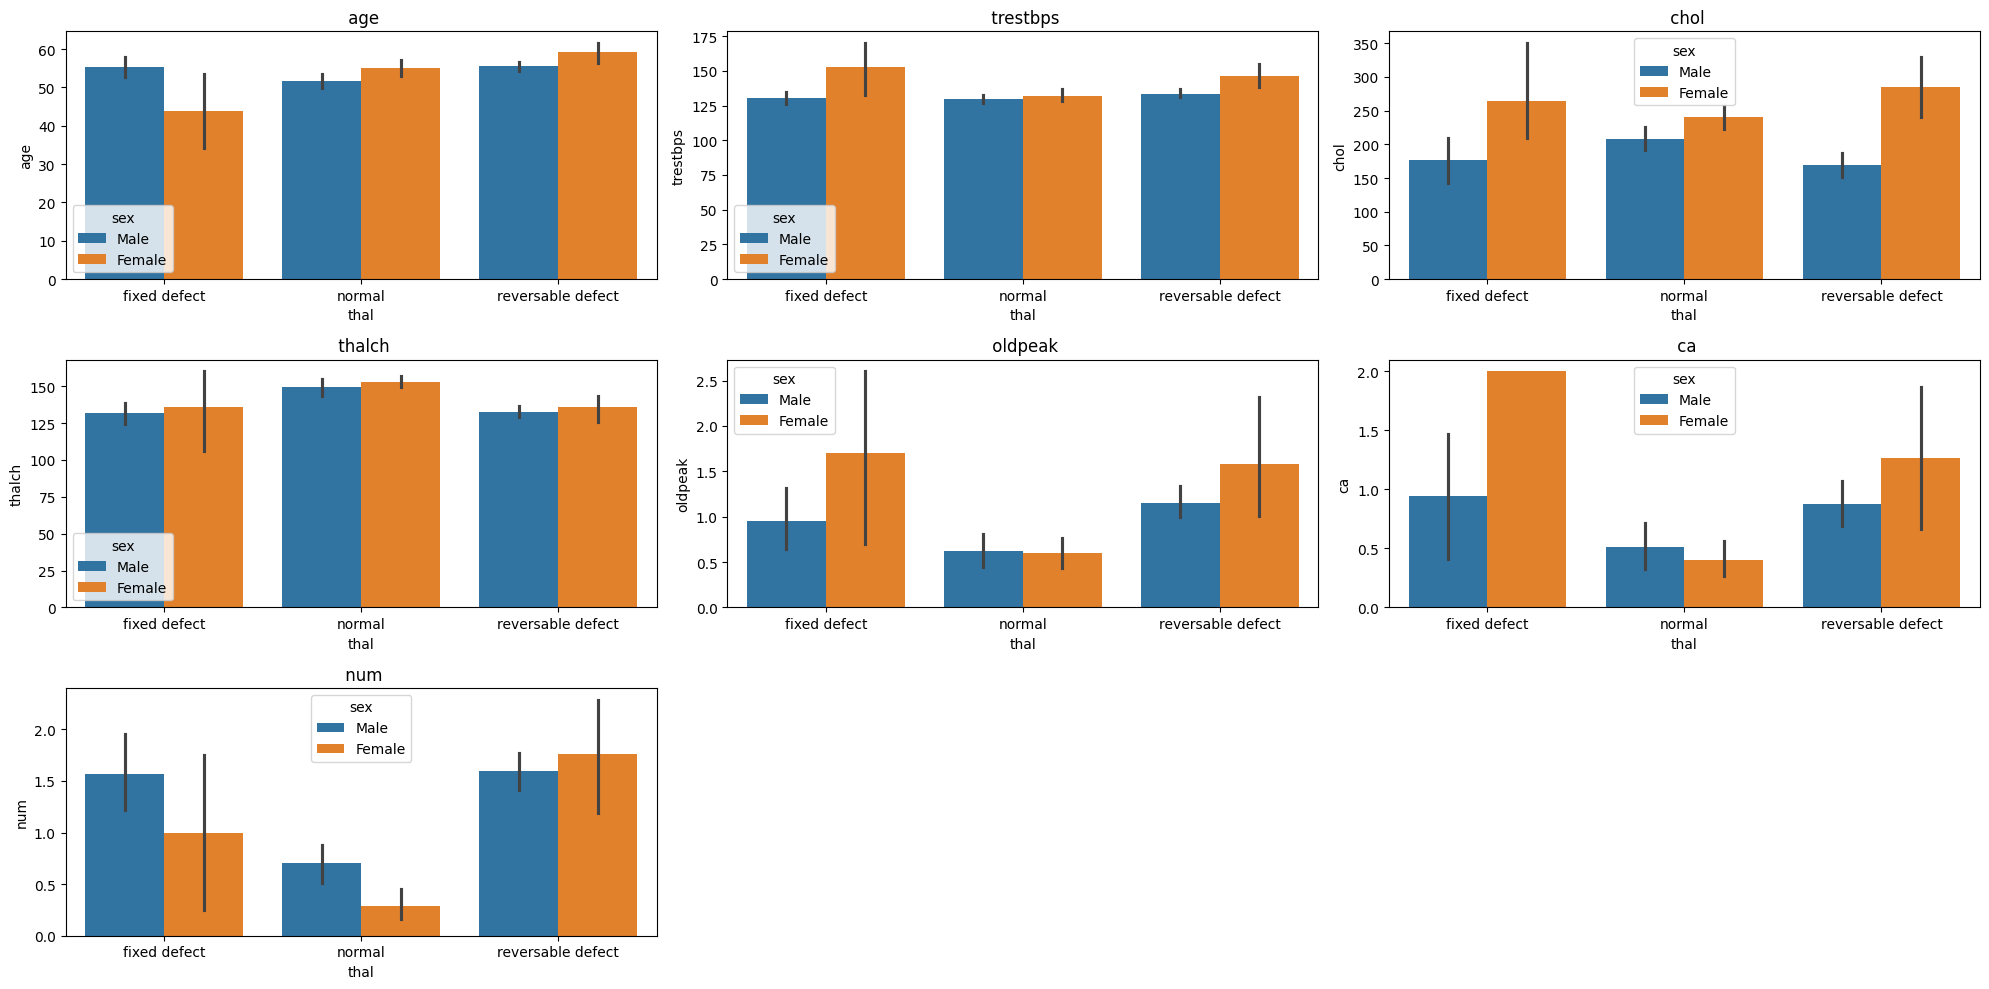

In [70]:
#bar chart:num vs cat
plt.figure(figsize= (20, 10))
#num_col_2=list(num_col_1)
#num_col_2.remove('num')
for i, col in enumerate(num_col_1):
    plt.subplot(3, 3, i+ 1)
    sns.barplot(x=df['thal'], y=df[col],hue=df['sex'])

    plt.xlabel(f"thal")
    plt.ylabel(f"{col}")
    plt.title(f" {col}")
    plt.subplots_adjust(wspace=0.4)

plt.tight_layout()
plt.show()

In [80]:
# Categorical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


# List of numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


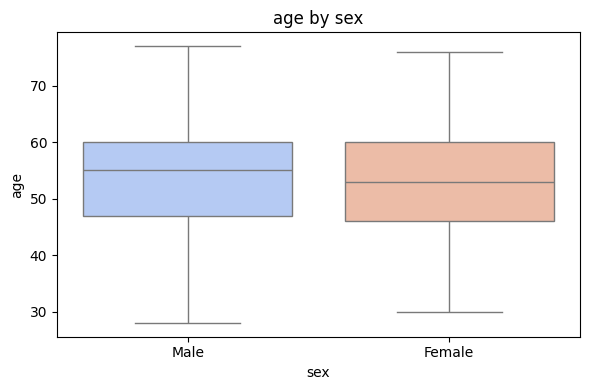

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


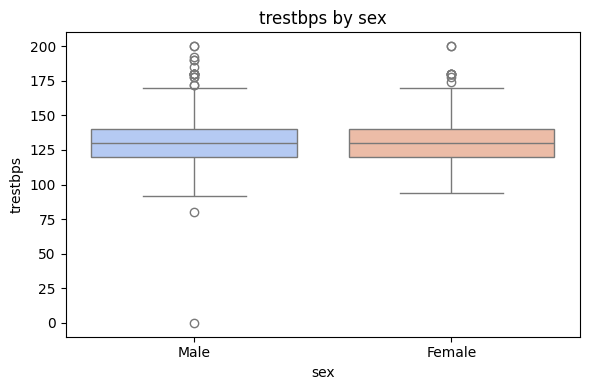

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


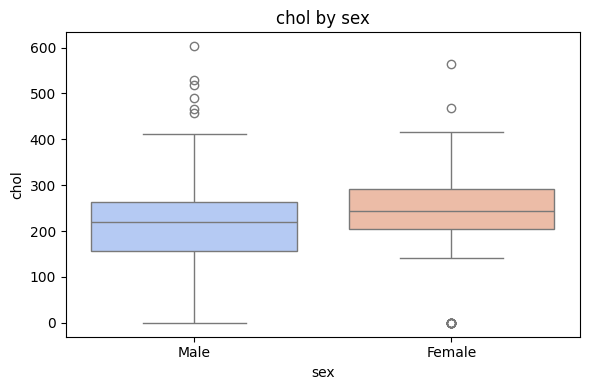

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


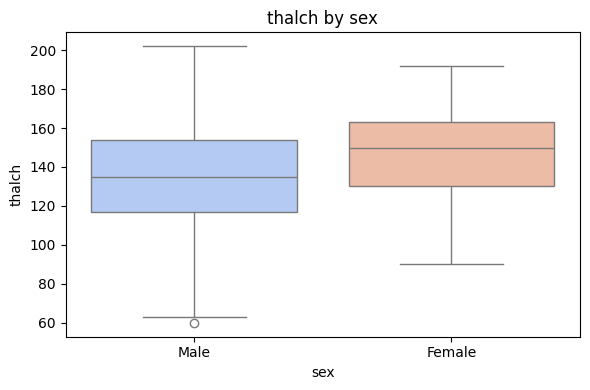

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


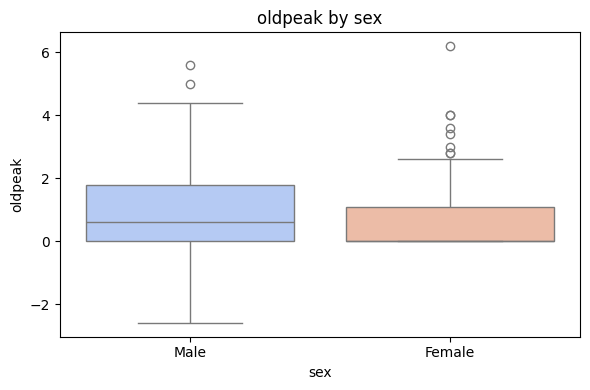

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


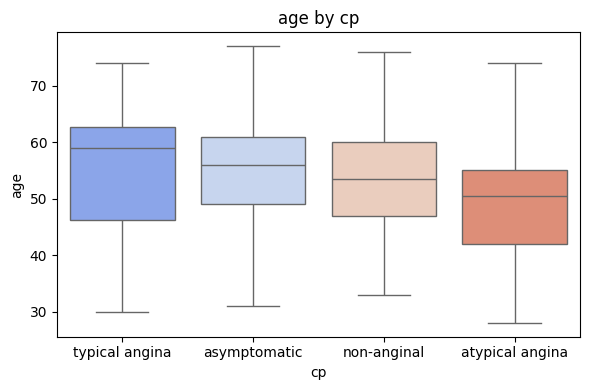

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


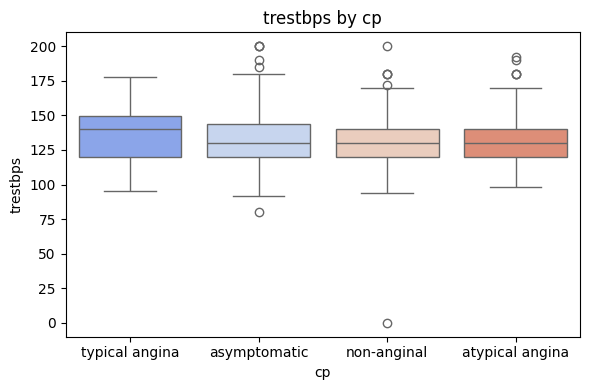

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


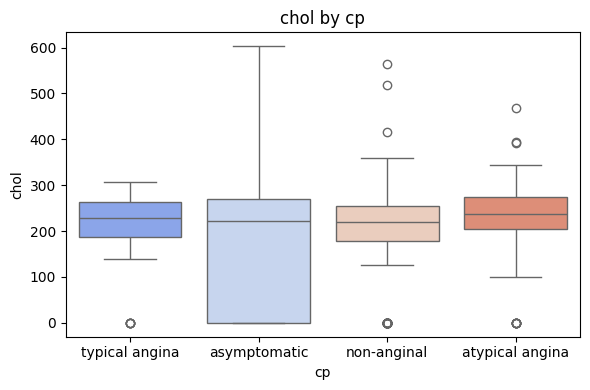

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


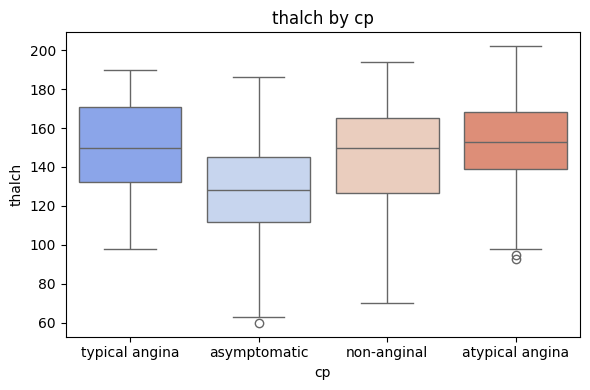

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


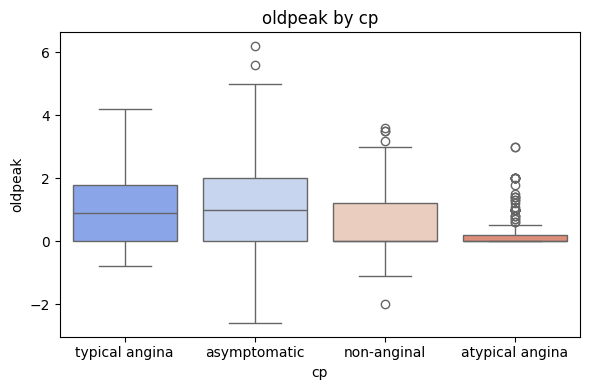

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


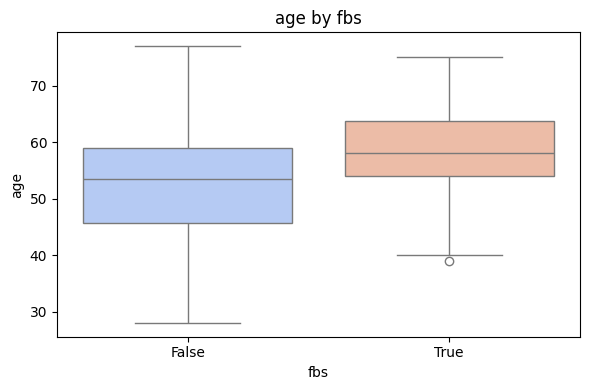

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


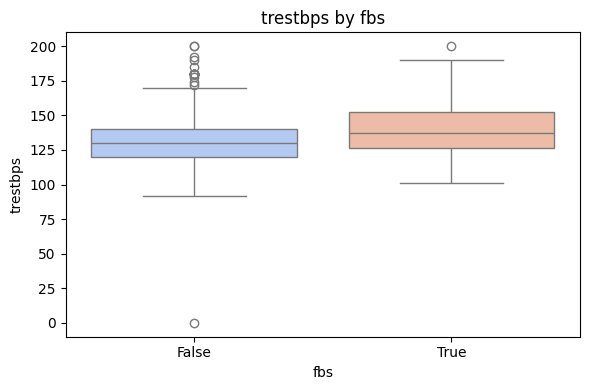

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


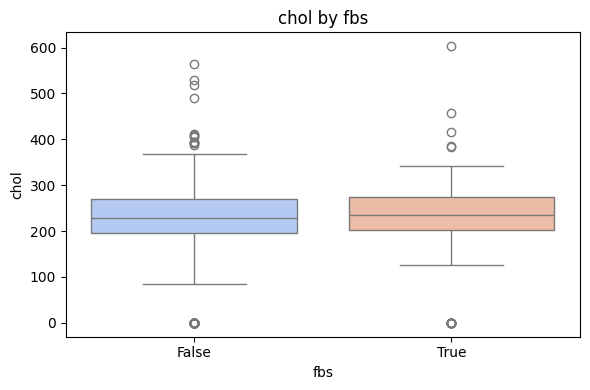

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


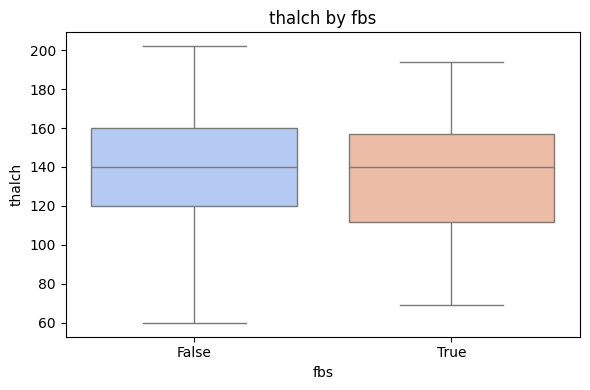

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


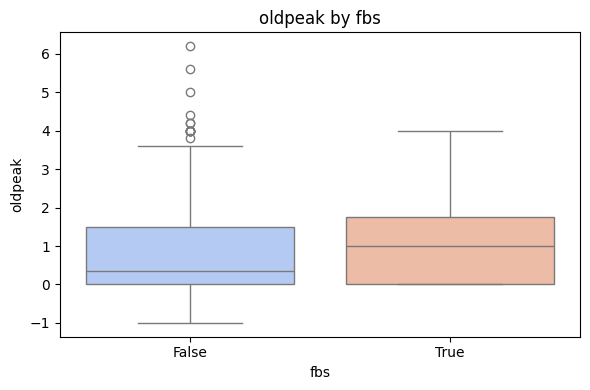

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


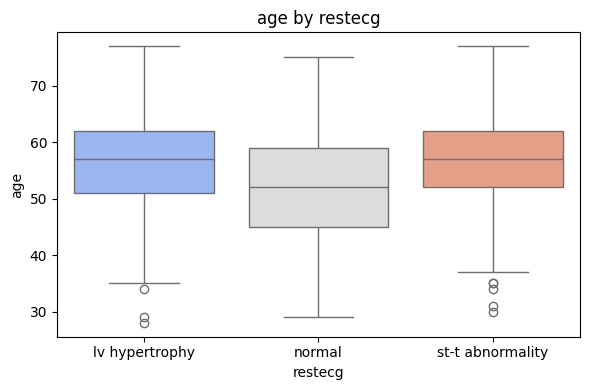

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


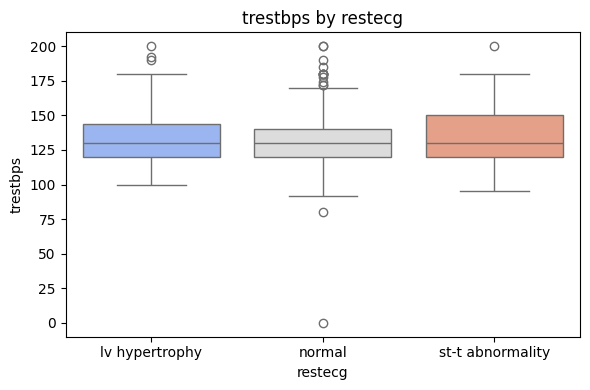

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


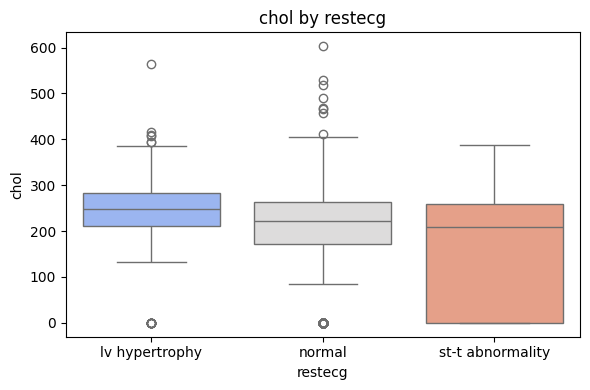

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


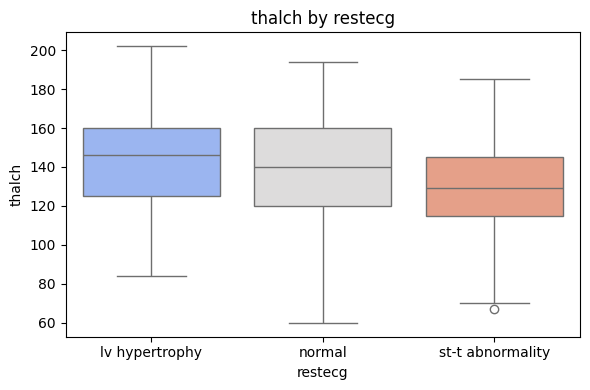

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


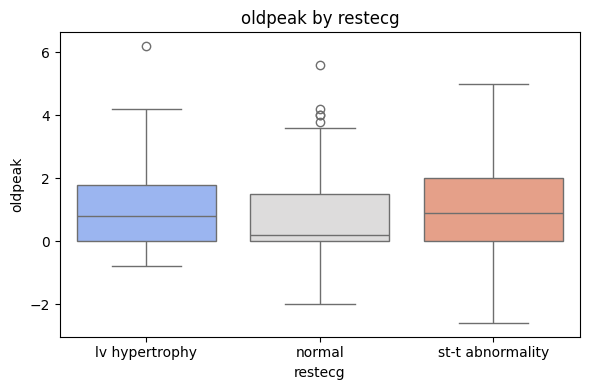

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


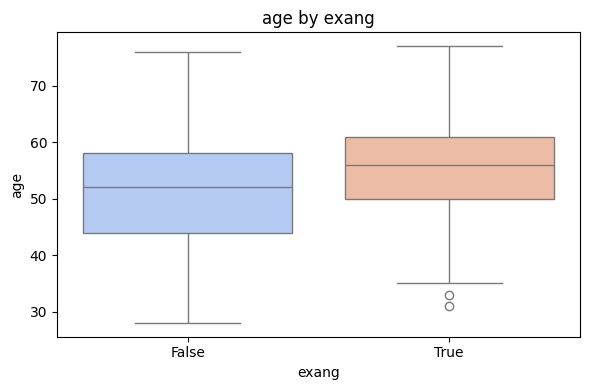

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


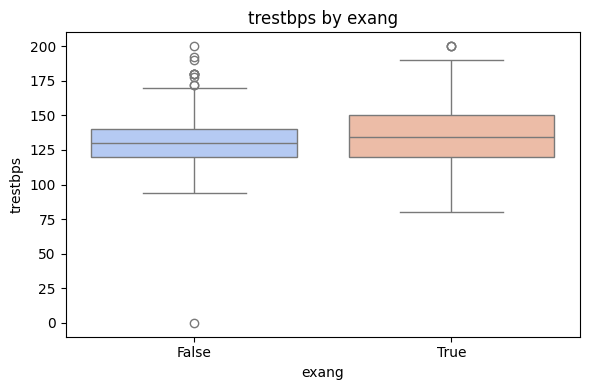

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


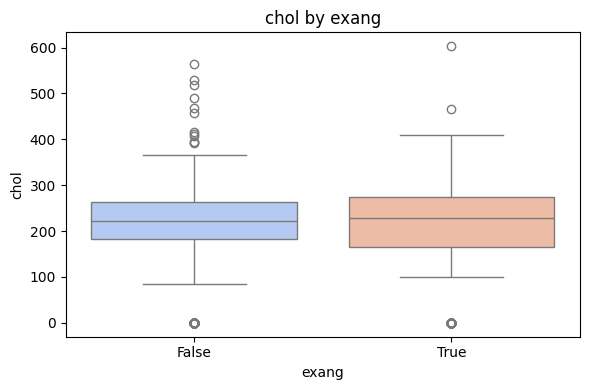

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


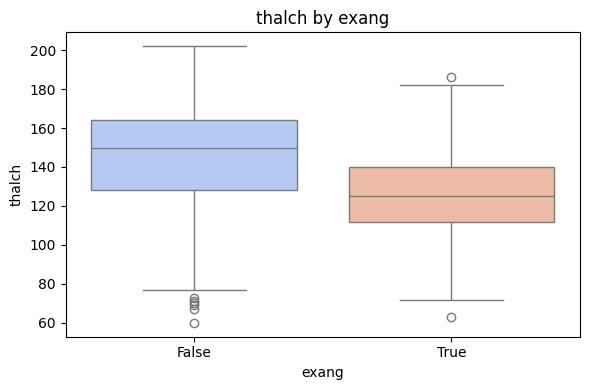

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


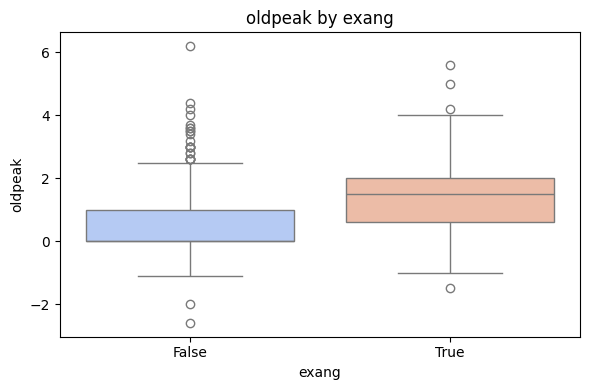

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


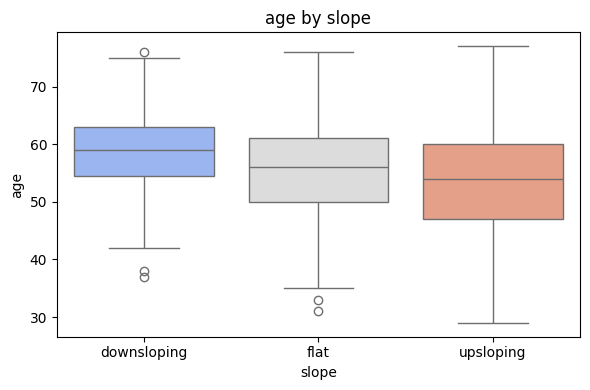

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


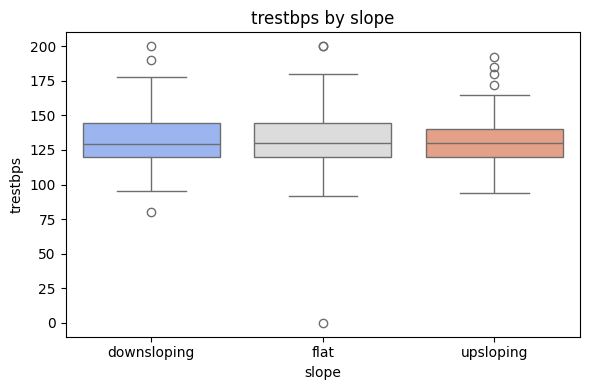

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


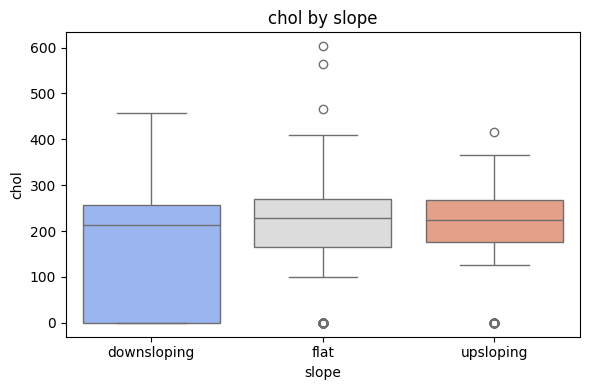

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


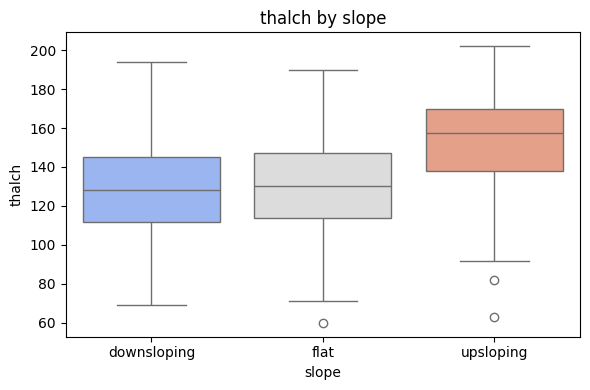

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


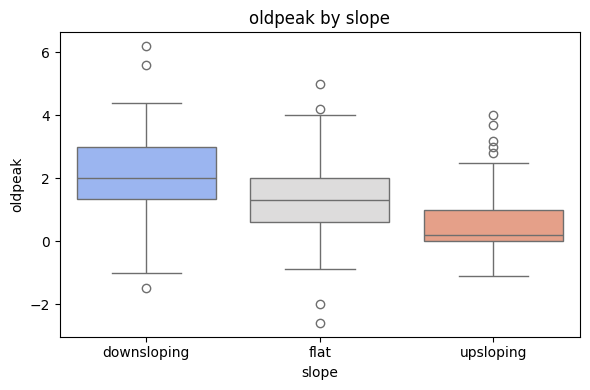

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


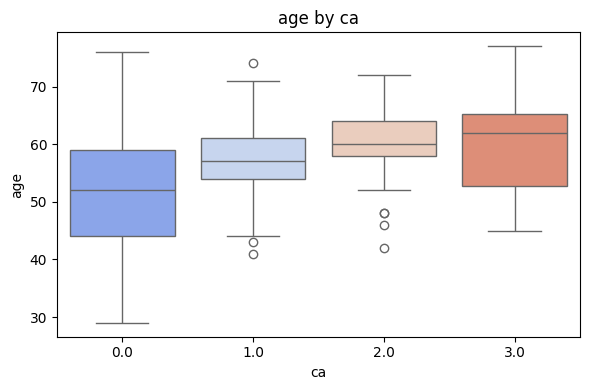

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


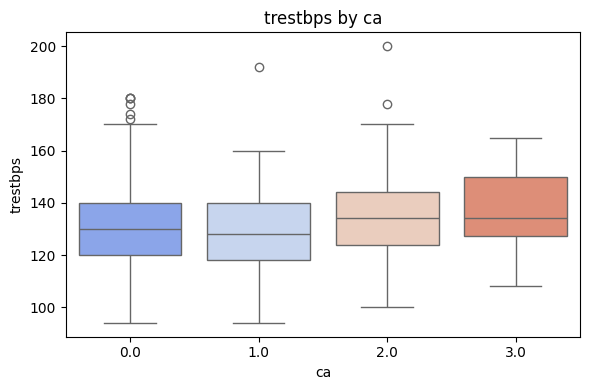

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


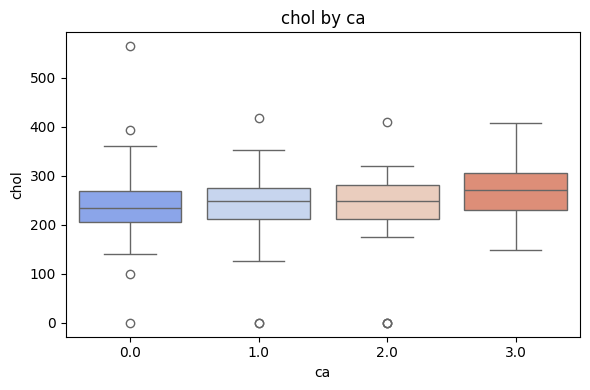

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


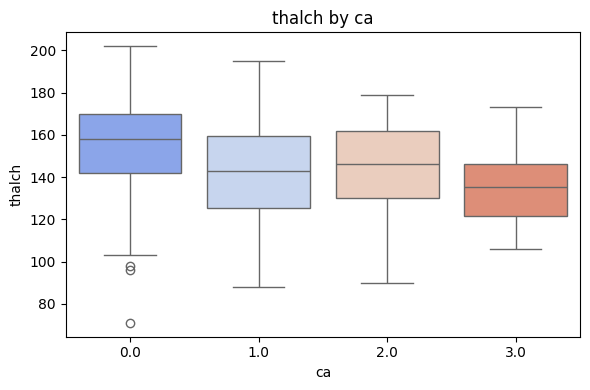

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


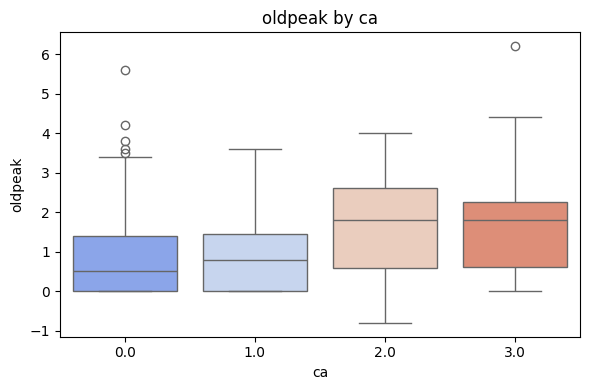

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


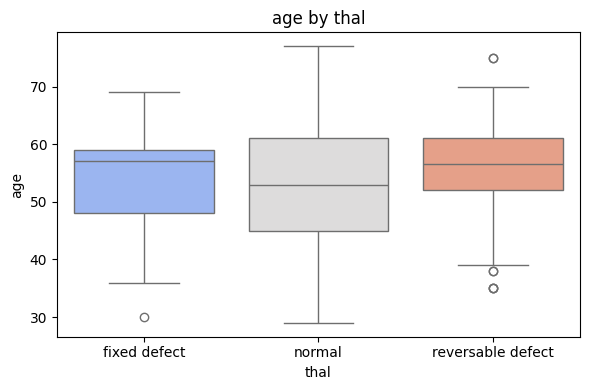

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


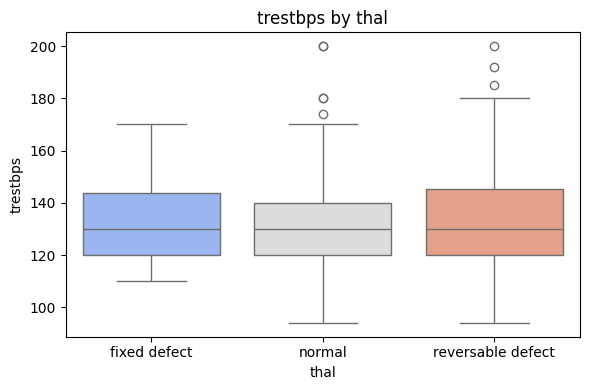

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


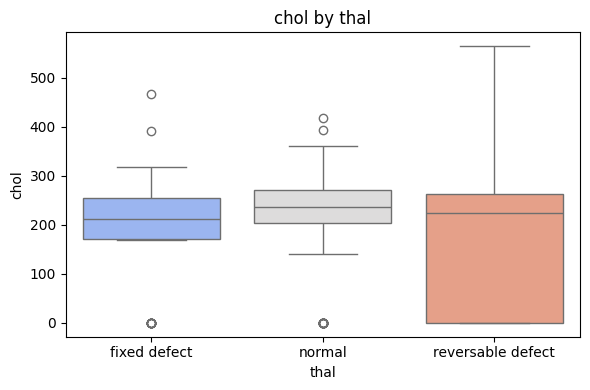

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


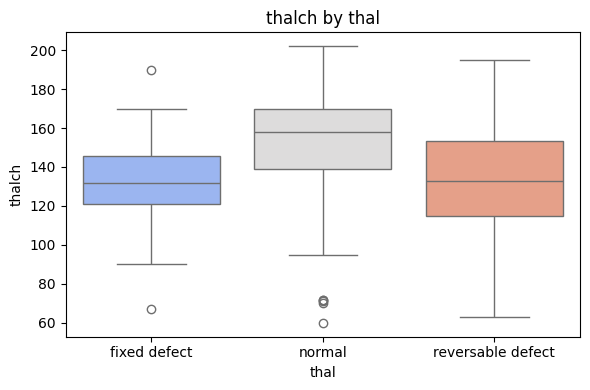

<ipython-input-81-a4eb011f0edc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')


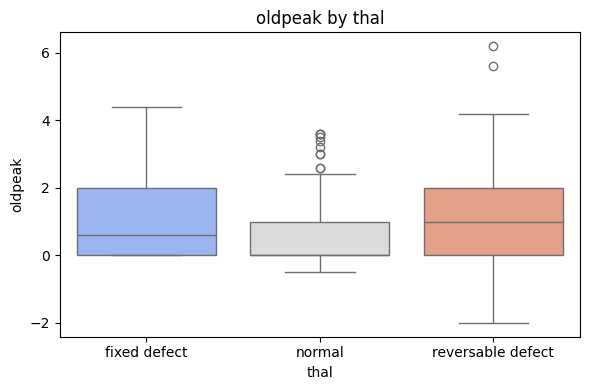

In [81]:
# Loop through combinations of numerical and categorical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')
        plt.title(f'{num_col} by {cat_col}')
        plt.tight_layout()
        plt.show()

## Multivariate Analysis

heat map used to discover the relationship between all num variables



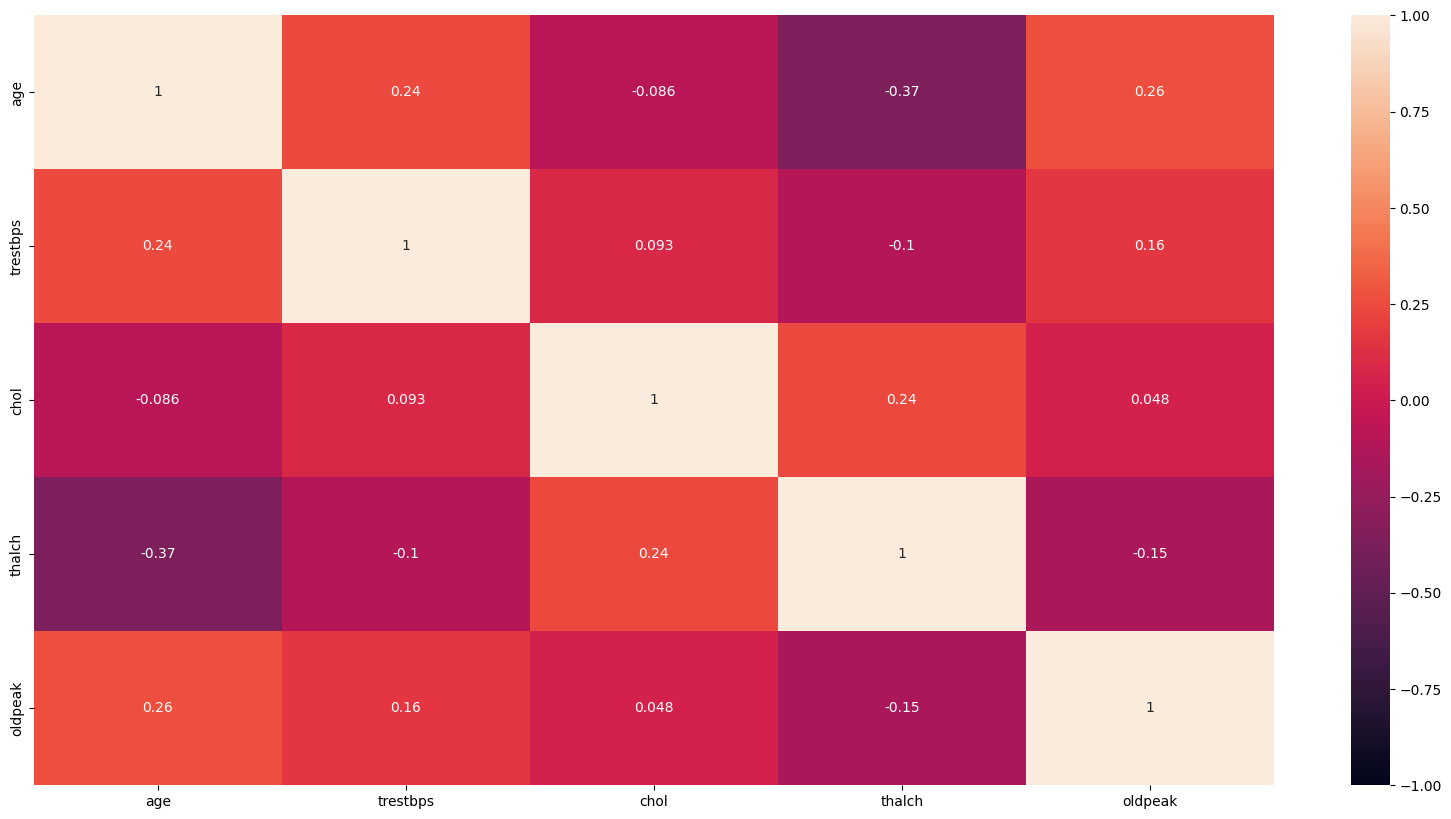

In [85]:
plt.figure(figsize= (20, 10))
sns.heatmap(data=df[numerical_cols].corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
df.corr(numeric_only=True)

id       age  trestbps      chol    thalch   oldpeak  \
id        1.000000  0.239301  0.052924 -0.376936 -0.466427  0.049930   
age       0.239301  1.000000  0.244253 -0.086234 -0.365778  0.258243   
trestbps  0.052924  0.244253  1.000000  0.092853 -0.104899  0.161908   
chol     -0.376936 -0.086234  0.092853  1.000000  0.236121  0.047734   
thalch   -0.466427 -0.365778 -0.104899  0.236121  1.000000 -0.151174   
oldpeak   0.049930  0.258243  0.161908  0.047734 -0.151174  1.000000   
ca        0.061433  0.370416  0.093705  0.051606 -0.264094  0.281817   
num       0.273552  0.339596  0.122291 -0.231547 -0.366265  0.443084   

                ca       num  
id        0.061433  0.273552  
age       0.370416  0.339596  
trestbps  0.093705  0.122291  
chol      0.051606 -0.231547  
thalch   -0.264094 -0.366265  
oldpeak   0.281817  0.443084  
ca        1.000000  0.516216  
num       0.516216  1.000000